In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Normalizer , scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [169]:
train = pd.read_csv("total.csv")
df = train

In [170]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [171]:
df.describe()

,timestamp,min_price,max_price,modal_price
count,7.418000e+03,7418.000000,7418.000000,7418.000000
mean,1.523025e+09,2551.547816,2999.163084,2804.140783
std,4.987461e-01,3563.042575,4199.273121,3917.043677
min,1.523025e+09,0.000000,0.000000,0.410000
25%,1.523025e+09,900.000000,1100.000000,1000.000000
50%,1.523025e+09,1650.000000,2000.000000,1828.500000
75%,1.523025e+09,3200.000000,3650.000000,3500.000000
max,1.523025e+09,95000.000000,110000.000000,100000.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     7418 non-null   int64  
 1   state         7418 non-null   object 
 2   district      7418 non-null   object 
 3   market        7418 non-null   object 
 4   commodity     7418 non-null   object 
 5   variety       7418 non-null   object 
 6   arrival_date  7418 non-null   object 
 7   min_price     7418 non-null   float64
 8   max_price     7418 non-null   float64
 9   modal_price   7418 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 579.7+ KB


In [138]:
df.shape

(7418, 10)

In [139]:
df.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

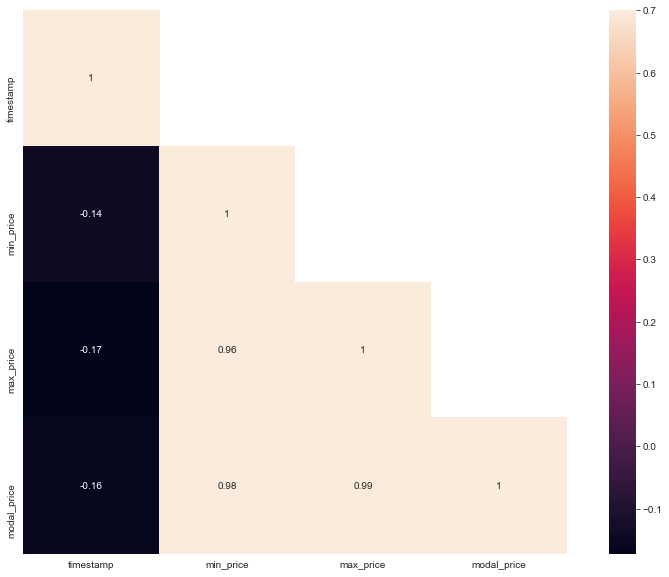

In [10]:
correlation_map = df[df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)
fig.savefig("1.png") 

In [11]:
df.state.unique()

array(['Assam', 'Chattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'NCT of Delhi', 'Orissa',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [12]:
df.state.nunique()

22

In [13]:
df.district.nunique()

348

In [14]:
df.district.unique()

array(['Barpeta', 'Dhemaji', 'Kamrup', 'Nagaon', 'Nalbari', 'Sonitpur',
       'Bastar', 'Bilaspur', 'Durg', 'Janjgir', 'Mahasamund',
       'North Bastar', 'Rajnandgaon', 'Surguja', 'Ahmedabad', 'Amreli',
       'Anand', 'Banaskanth', 'Bharuch', 'Bhavnagar', 'Dahod',
       'Gandhinagar', 'Jamnagar', 'Junagarh', 'Kheda', 'Mehsana', 'Morbi',
       'Panchmahals', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha',
       'Surat', 'Surendranagar', 'Vadodara(Baroda)', 'Valsad', 'Ambala',
       'Bhiwani', 'Faridabad', 'Fatehabad', 'Jind', 'Kaithal', 'Karnal',
       'Kurukshetra', 'Mahendragarh-Narnaul', 'Panchkula', 'Rohtak',
       'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba', 'Hamirpur', 'Kangra',
       'Kullu', 'Mandi', 'Shimla', 'Sirmore', 'Solan', 'Una', 'Bokaro',
       'Dhanbad', 'East Singhbhum', 'Garhwa', 'Giridih', 'Godda', 'Gumla',
       'Koderma', 'Lohardaga', 'Pakur', 'Ranchi', 'Simdega', 'Bagalkot',
       'Bangalore', 'Belgaum', 'Bellary', 'Bidar', 'Bijapur',
       'Chamraj

In [15]:
df.market.nunique()

990

In [16]:
df.commodity.nunique()

192

In [17]:
df.commodity.unique()

array(['Black Gram (Urd Beans)', 'Corriander seed', 'Jute',
       'Lentil(Masur)', 'Mustard', 'Potato', 'Wheat Atta', 'Maida Atta',
       'Green Chilli', 'Green Gram Dal (Moong Dal)', 'Paddy(Dhan)',
       'Bengal Gram(Gram)', 'Lak(Teora)', 'Onion', 'Tomato', 'Tinda',
       'Mahua', 'Bhindi(Ladies Finger)', 'Lemon', 'Maize', 'Bottle gourd',
       'Brinjal', 'Carrot', 'Methi(Leaves)', 'Cotton',
       'Bajra(Pearl Millet/Cumbu)', 'Castor Seed', 'Chili Red',
       'Cummin Seed(Jeera)', 'Jowar(Sorghum)', 'Methi Seeds',
       'Sesamum(Sesame,Gingelly,Til)', 'Wheat', 'Suva (Dill Seed)',
       'Rajgir', 'Soanf', 'Guar Seed(Cluster Beans Seed)',
       'Coriander(Leaves)', 'Ginger(Green)', 'Groundnut',
       'Arhar (Tur/Red Gram)', 'Beans', 'Soyabean', 'Barley (Jau)',
       'Green Gram (Moong)', 'Groundnut (Split)', 'Isabgul (Psyllium)',
       'Kulthi(Horse Gram)', 'Ground Nut Seed', 'Garlic', 'Cluster beans',
       'Cauliflower', 'Cucumbar(Kheera)', 'Pumpkin', 'Apple',
       'Bit

In [18]:
df.variety.nunique()

337

In [19]:
df.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     7418 non-null   int64  
 1   state         7418 non-null   object 
 2   district      7418 non-null   object 
 3   market        7418 non-null   object 
 4   commodity     7418 non-null   object 
 5   variety       7418 non-null   object 
 6   arrival_date  7418 non-null   object 
 7   min_price     7418 non-null   float64
 8   max_price     7418 non-null   float64
 9   modal_price   7418 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 579.7+ KB


In [21]:
df.info

<bound method DataFrame.info of        timestamp        state        district     market  \
0     1523025126        Assam         Barpeta  Bohorihat   
1     1523025126        Assam         Barpeta  Bohorihat   
2     1523025126        Assam         Barpeta  Bohorihat   
3     1523025126        Assam         Barpeta  Bohorihat   
4     1523025126        Assam         Barpeta  Bohorihat   
...          ...          ...             ...        ...   
7413  1523025127  West Bengal  Uttar Dinajpur   Islampur   
7414  1523025127  West Bengal  Uttar Dinajpur   Islampur   
7415  1523025127  West Bengal  Uttar Dinajpur   Islampur   
7416  1523025127  West Bengal  Uttar Dinajpur    Raiganj   
7417  1523025127  West Bengal  Uttar Dinajpur    Raiganj   

                   commodity             variety arrival_date  min_price  \
0     Black Gram (Urd Beans)  Black Gram (Whole)   06/04/2018     2800.0   
1            Corriander seed      Coriander Seed   06/04/2018     3500.0   
2                  

In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
df_o = df.select_dtypes(include=objects)

In [23]:
newdf.columns               #  numeric columns

Index(['timestamp', 'min_price', 'max_price', 'modal_price'], dtype='object')

In [24]:
df_o.columns                 #  categorical columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date'], dtype='object')

In [26]:
df.state.value_counts()

Uttar Pradesh       2343
Kerala               970
Maharashtra          676
Punjab               599
Karnataka            421
Gujarat              342
West Bengal          302
Haryana              279
Orissa               257
Telangana            245
Himachal Pradesh     239
Tamil Nadu           184
Jharkhand            130
Madhya Pradesh       123
Rajasthan            104
Uttrakhand            71
NCT of Delhi          36
Tripura               33
Chattisgarh           23
Assam                 21
Meghalaya             12
Pondicherry            8
Name: state, dtype: int64

In [27]:
df.district.value_counts()

Agra             139
Kottayam         137
Palakad          136
Ernakulam        124
Alappuzha        120
                ... 
Sagar              1
West District      1
Champawat          1
Virudhunagar       1
Jalore             1
Name: district, Length: 348, dtype: int64

In [28]:
df.commodity.value_counts()

Potato                383
Onion                 353
Tomato                340
Brinjal               312
Wheat                 281
                     ... 
Marigold(Calcutta)      1
Groundnut (Split)       1
Jaffri                  1
Jarbara                 1
Mataki                  1
Name: commodity, Length: 192, dtype: int64

In [29]:
pd.crosstab([df.state], [df.commodity], margins=True).style.background_gradient(cmap='autumn_r')

In [73]:
gp = df.loc[(df.state == "Telangana") , : ]

In [74]:
a = ""
for i in range(0 , gp.shape[0]):
    a = a + gp.commodity + "    " + gp.variety + "    " + gp.arrival_date + "    " + str(gp.min_price) + "    " + str(gp.max_price) + "    " + str(gp.modal_price) + "    "

In [75]:
a

4424    Cotton    Cotton (Unginned)    06/04/2018    4...
4425    Cotton    Cotton (Unginned)    06/04/2018    4...
4426    Maize    Hybrid    06/04/2018    4424    4068....
4427    Cotton    Cotton (Unginned)    06/04/2018    4...
4428    Cotton    Cotton (Unginned)    06/04/2018    4...
                              ...                        
4664    Cotton    Cotton (Unginned)    06/04/2018    4...
4665    Maize    Hybrid    06/04/2018    4424    4068....
4666    Cotton    Cotton (Unginned)    06/04/2018    4...
4667    Cotton    Cotton (Unginned)    06/04/2018    4...
4668    Maize    Local    06/04/2018    4424    4068.0...
Length: 245, dtype: object

In [76]:
gp

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
4424,1523025127,Telangana,Adilabad,Adilabad,Cotton,Cotton (Unginned),06/04/2018,4068.0,4500.0,4500.0
4425,1523025127,Telangana,Adilabad,Asifabad,Cotton,Cotton (Unginned),06/04/2018,4320.0,4600.0,4500.0
4426,1523025127,Telangana,Adilabad,Bhainsa,Maize,Hybrid,06/04/2018,1089.0,1129.0,1104.0
4427,1523025127,Telangana,Adilabad,Boath,Cotton,Cotton (Unginned),06/04/2018,4200.0,4450.0,4400.0
4428,1523025127,Telangana,Adilabad,Ichoda,Cotton,Cotton (Unginned),06/04/2018,4500.0,4500.0,4500.0
...,...,...,...,...,...,...,...,...,...,...
4664,1523025127,Telangana,Warangal,Narsampet,Cotton,Cotton (Unginned),06/04/2018,3200.0,4500.0,4200.0
4665,1523025127,Telangana,Warangal,Narsampet,Maize,Hybrid,06/04/2018,1090.0,1210.0,1182.0
4666,1523025127,Telangana,Warangal,Thorrur,Cotton,Cotton (Unginned),06/04/2018,4320.0,4320.0,4320.0
4667,1523025127,Telangana,Warangal,Warangal,Cotton,Cotton (Unginned),06/04/2018,4225.0,4680.0,4425.0


In [77]:
def get_graphs(state , district , market):
    gp = df.loc[(df.state == state) & (df.district == district) & (df.market == market), : ]
    fig, axes = plt.subplots(5,1)
    fig.set_size_inches(20, 30)
    sns.barplot(data=gp ,y="modal_price",x="commodity", hue = "variety" ,orient="v" ,ax=axes[0] )
    sns.kdeplot(gp.modal_price , shade=True, color="r" , ax=axes[1] )
    sns.stripplot(x="commodity", y="modal_price", data=gp , hue = "variety" , jitter=True , ax = axes[2])
    sns.distplot(gp.modal_price , ax = axes[3])
    sns.pointplot(x="commodity", y="modal_price", data=gp , ax = axes[4] ) 
    fig.savefig("2.png") 

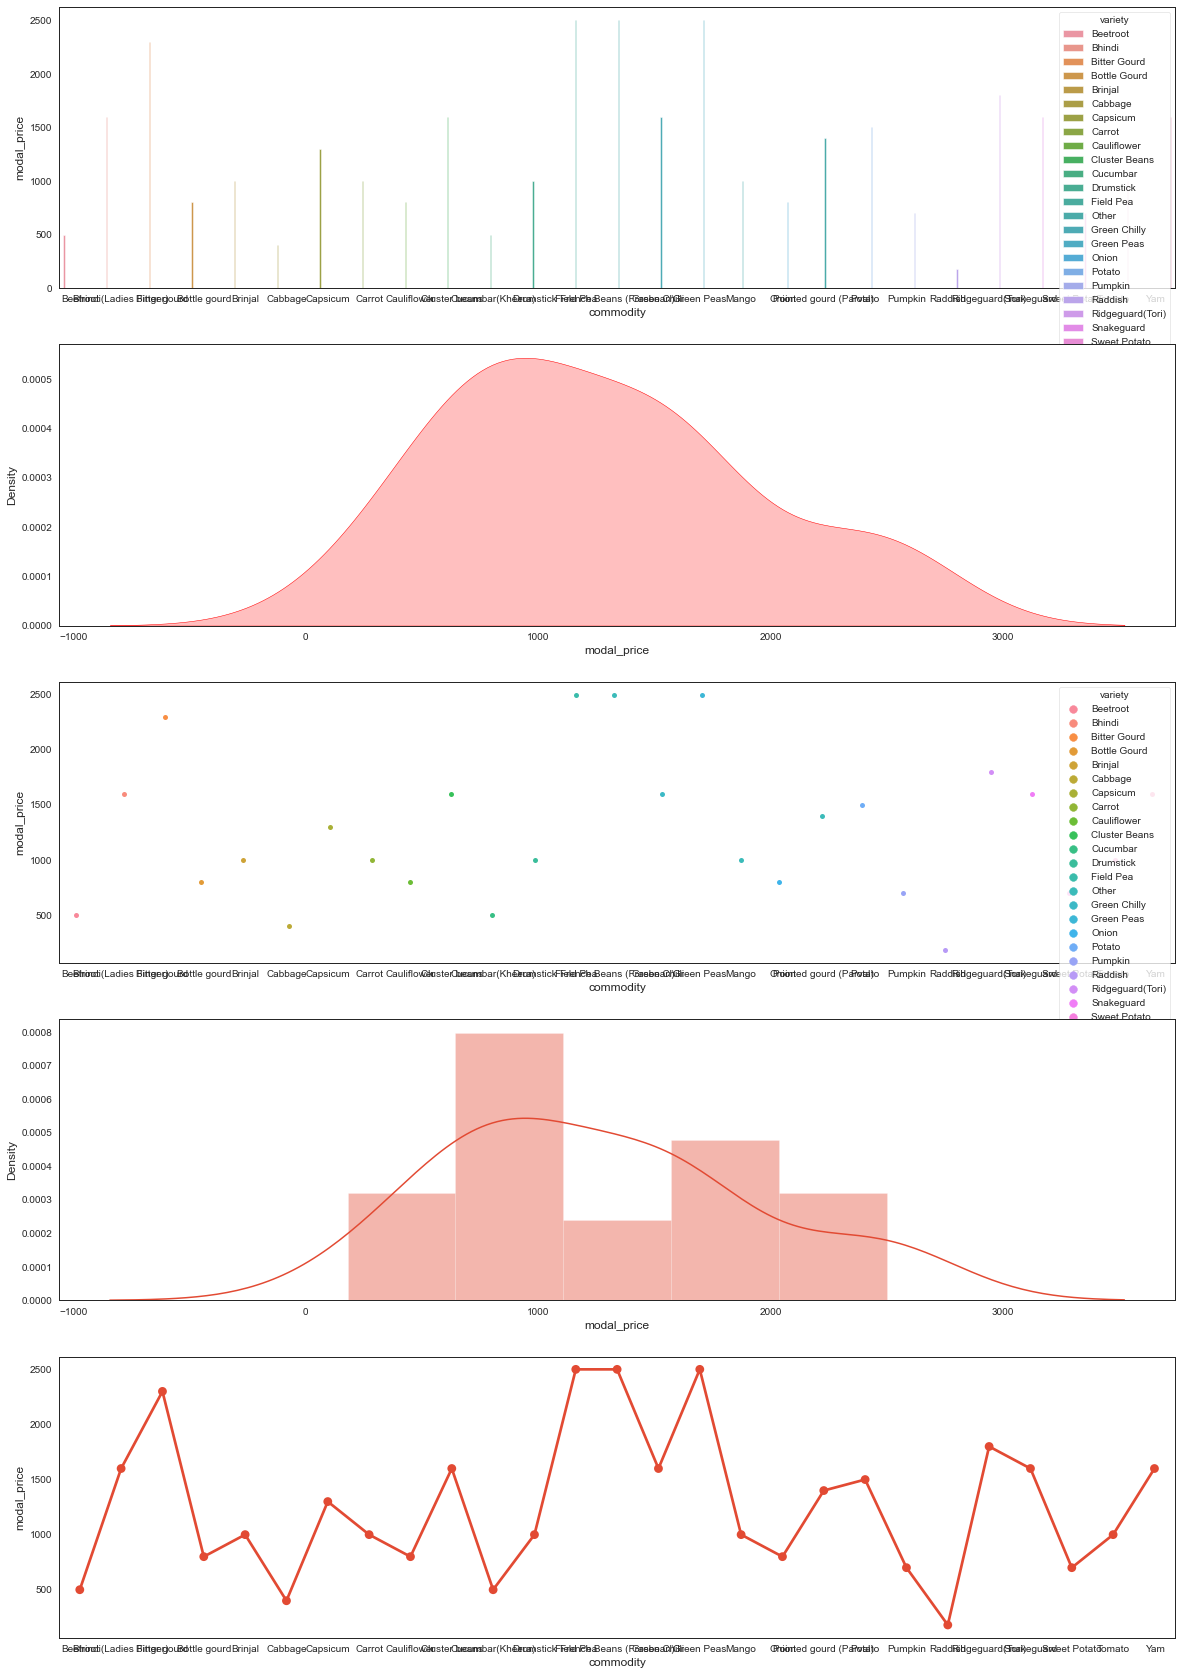

In [78]:
get_graphs("Telangana" , "Hyderabad" , "Bowenpally")

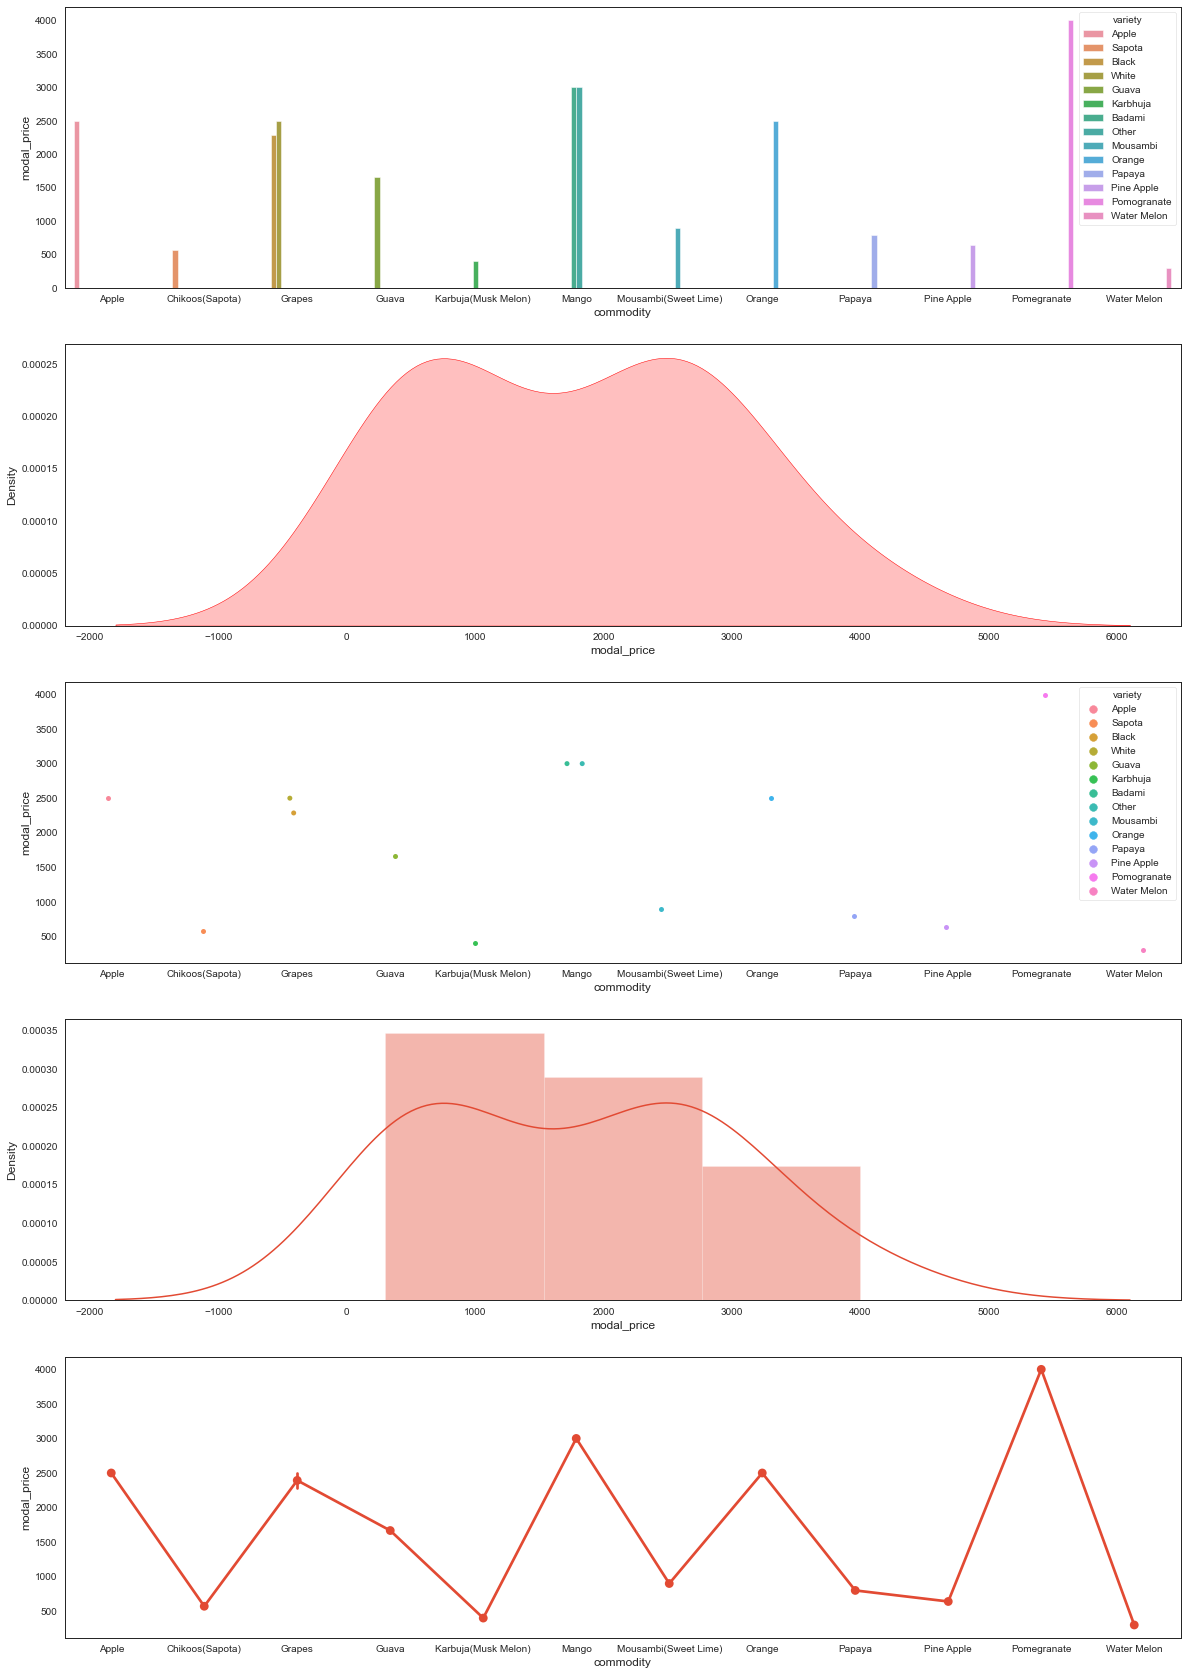

In [79]:
get_graphs("Telangana" , "Hyderabad" , "Gaddiannaram")

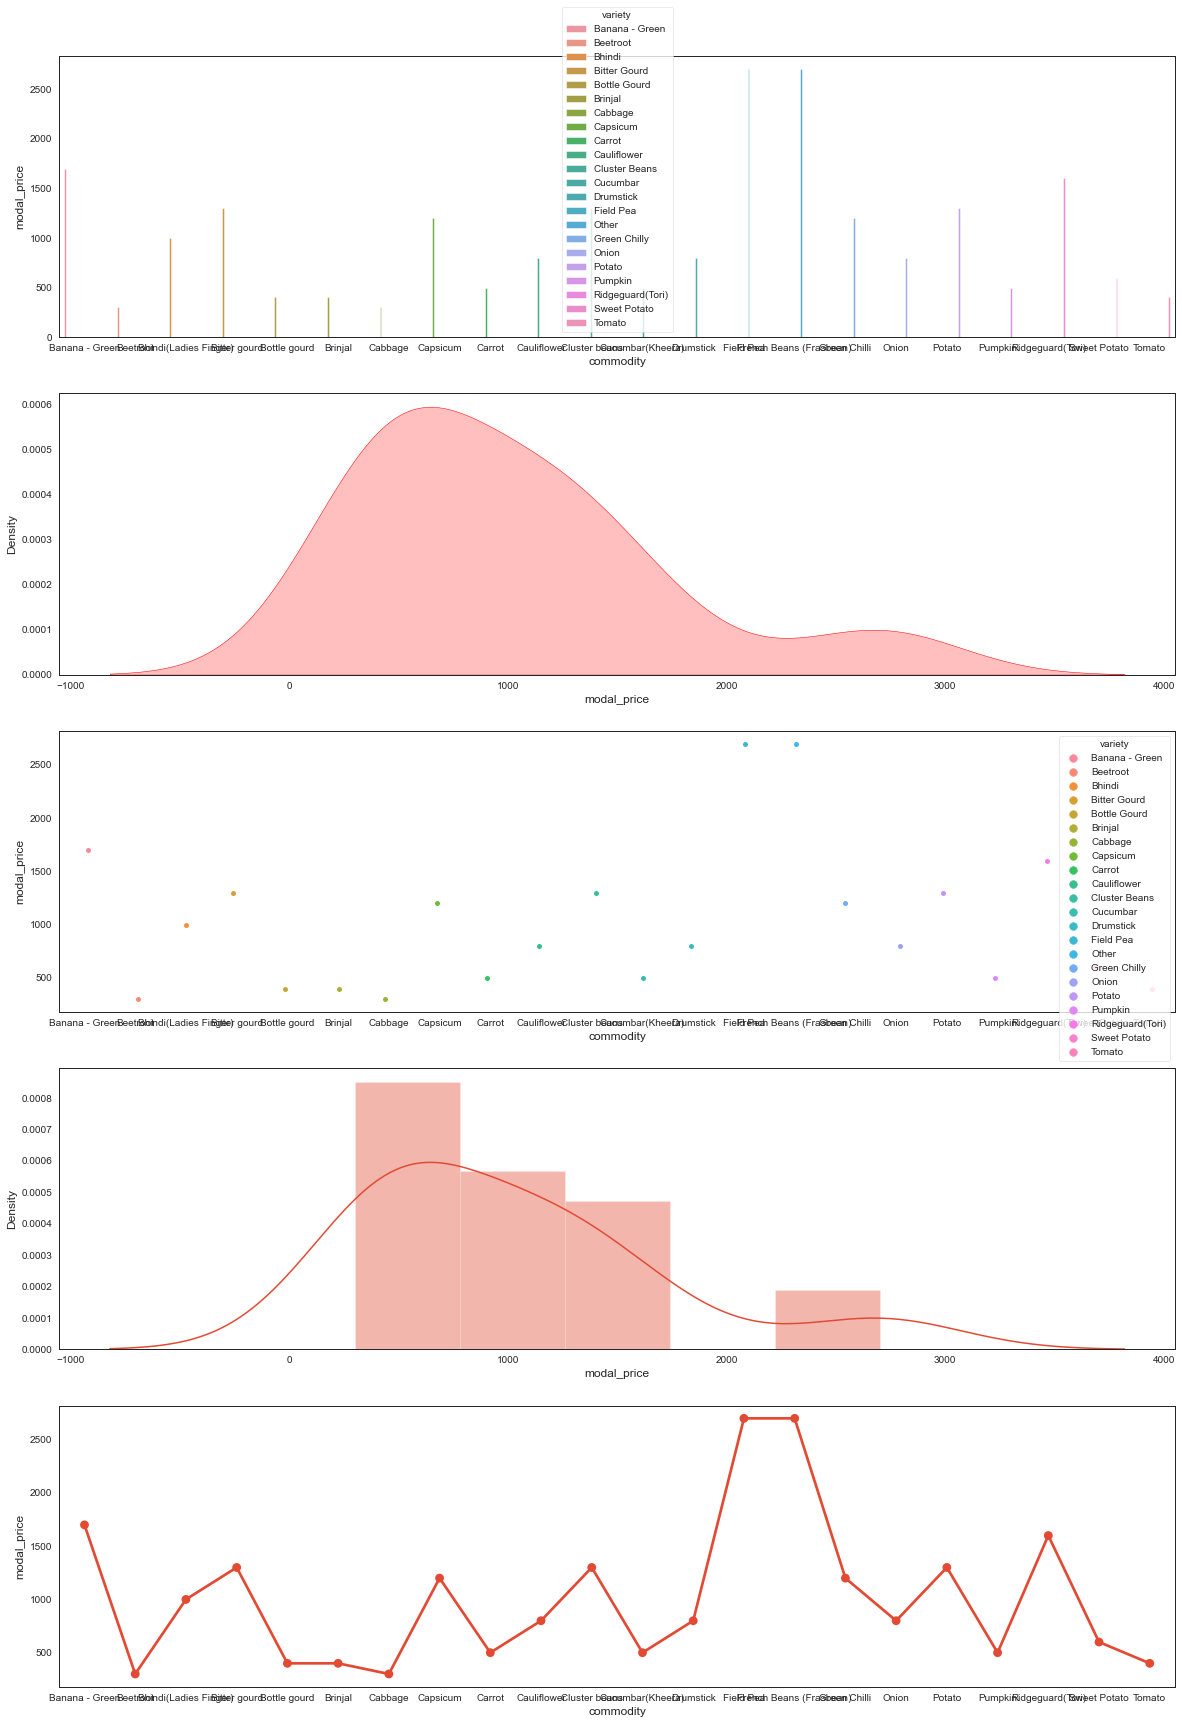

In [80]:
get_graphs("Telangana" , "Hyderabad" , "Gudimalkapur")

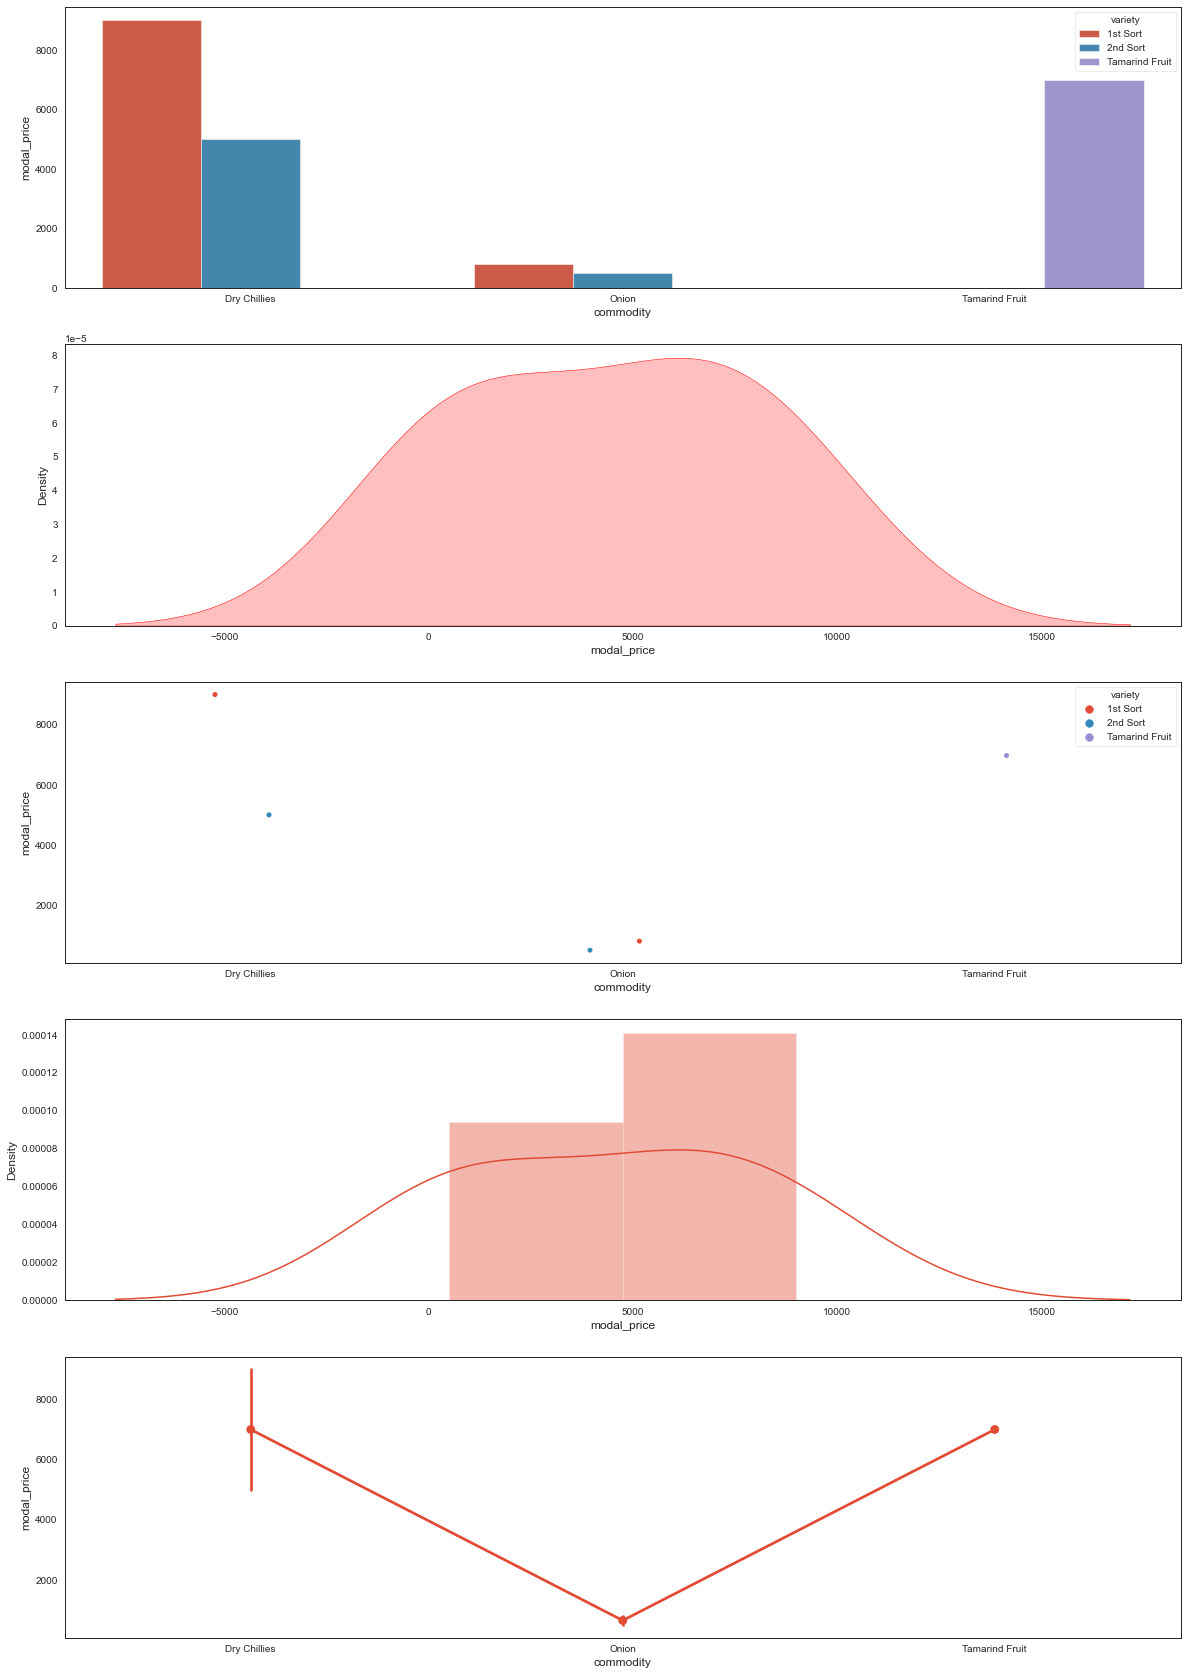

In [81]:
get_graphs("Telangana" , "Hyderabad" , "Hyderabad (F&V)")

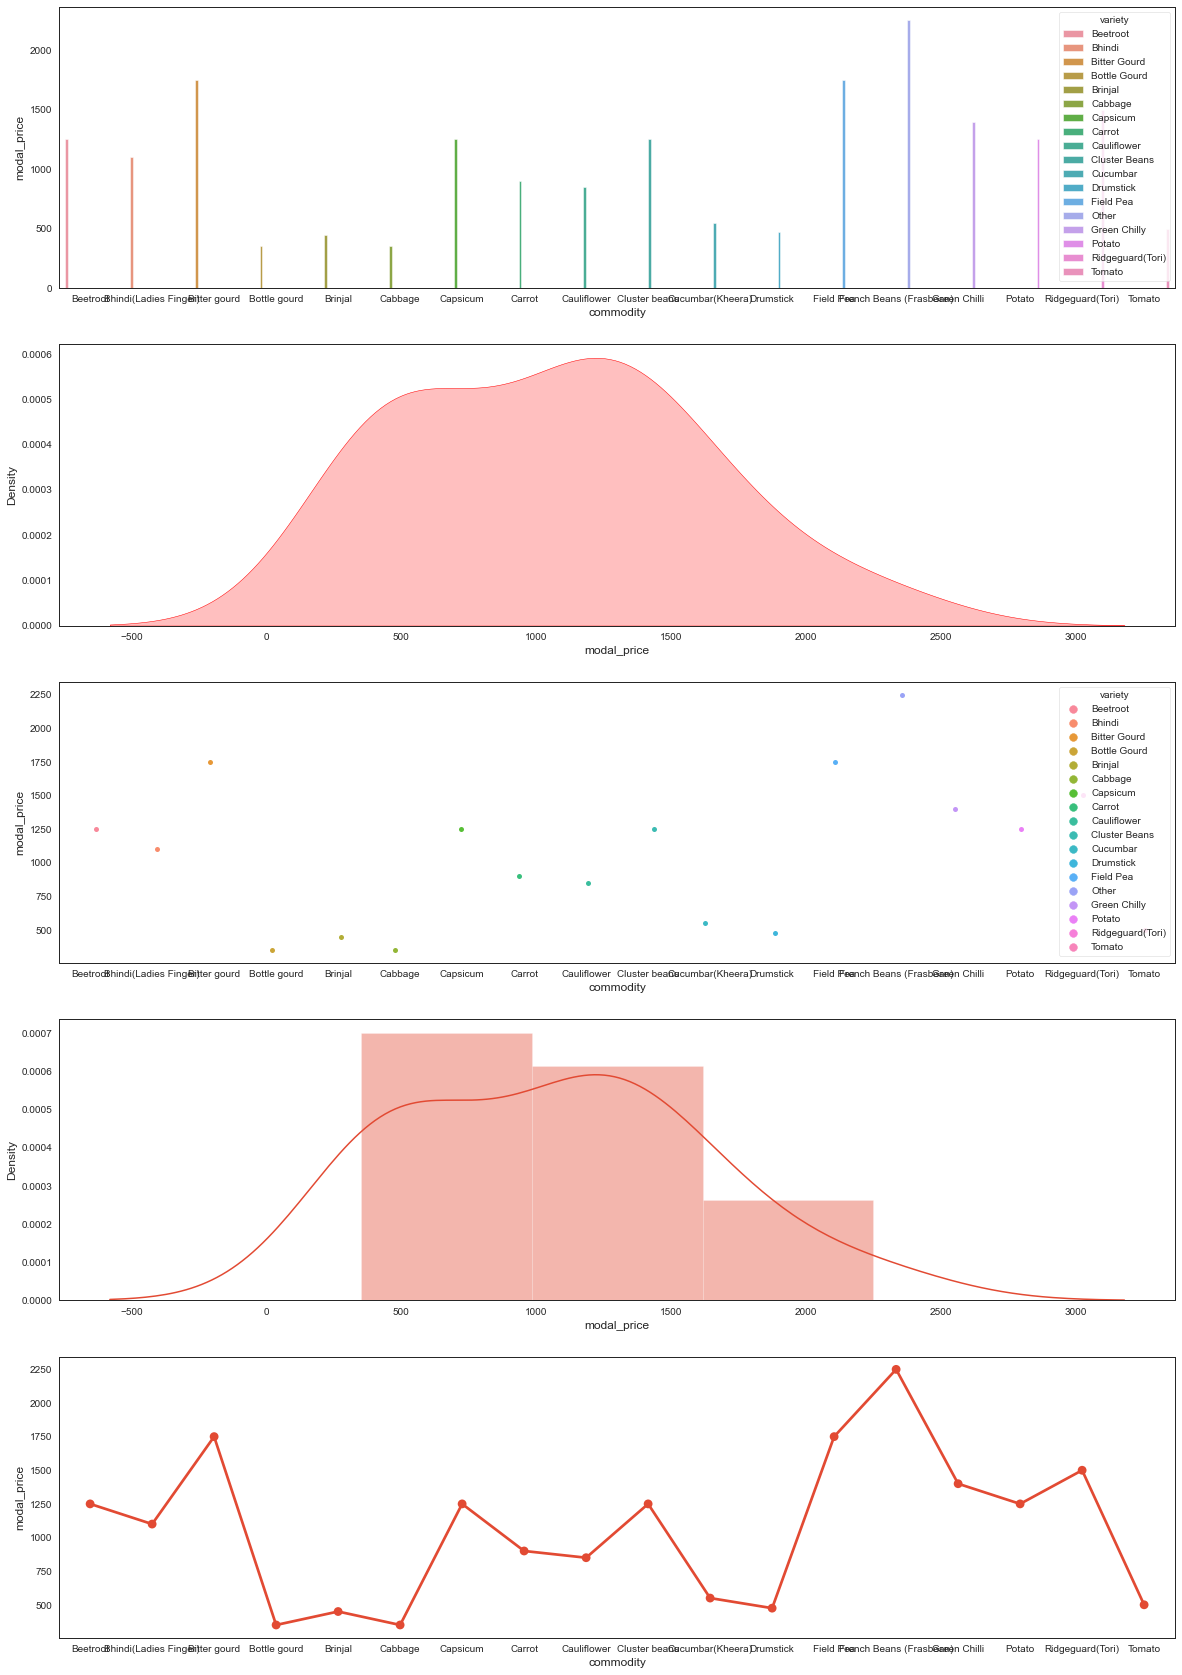

In [82]:
get_graphs("Telangana" , "Hyderabad" , "L B Nagar")

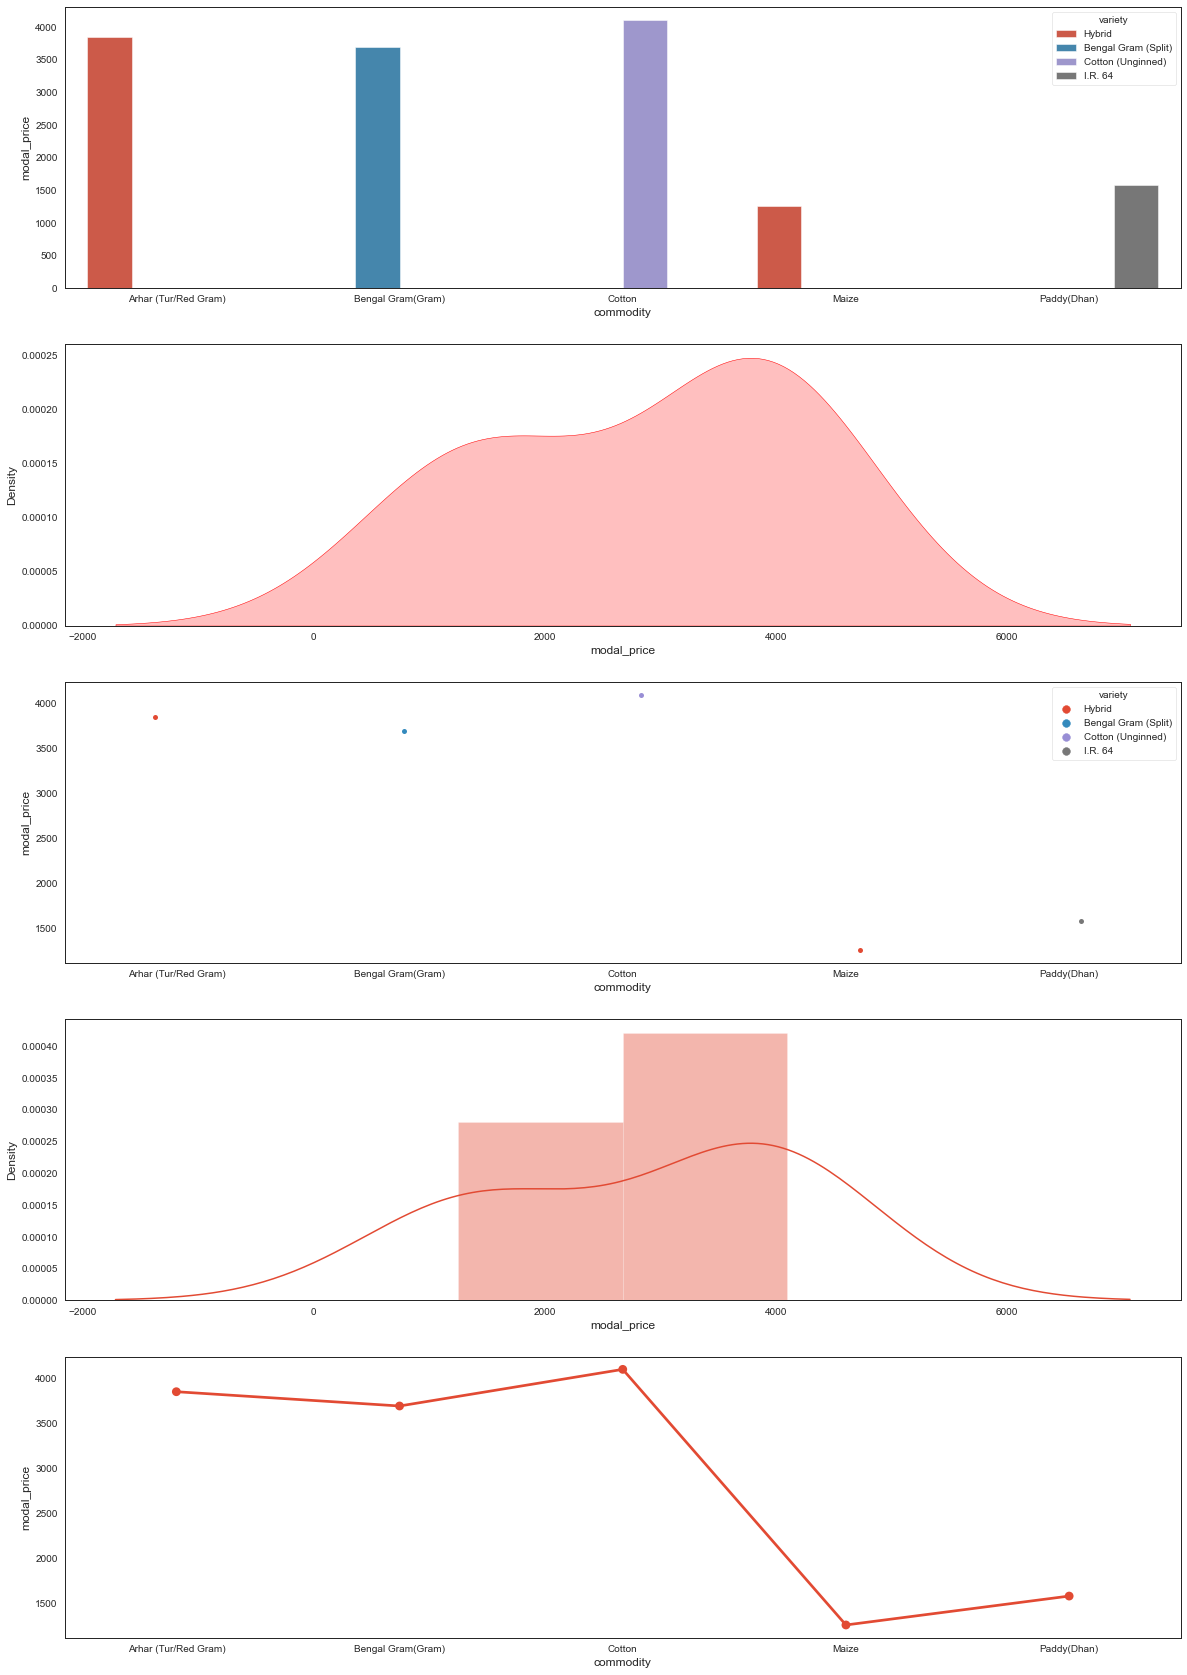

In [83]:
get_graphs("Telangana" , "Karimnagar" , "Choppadandi")

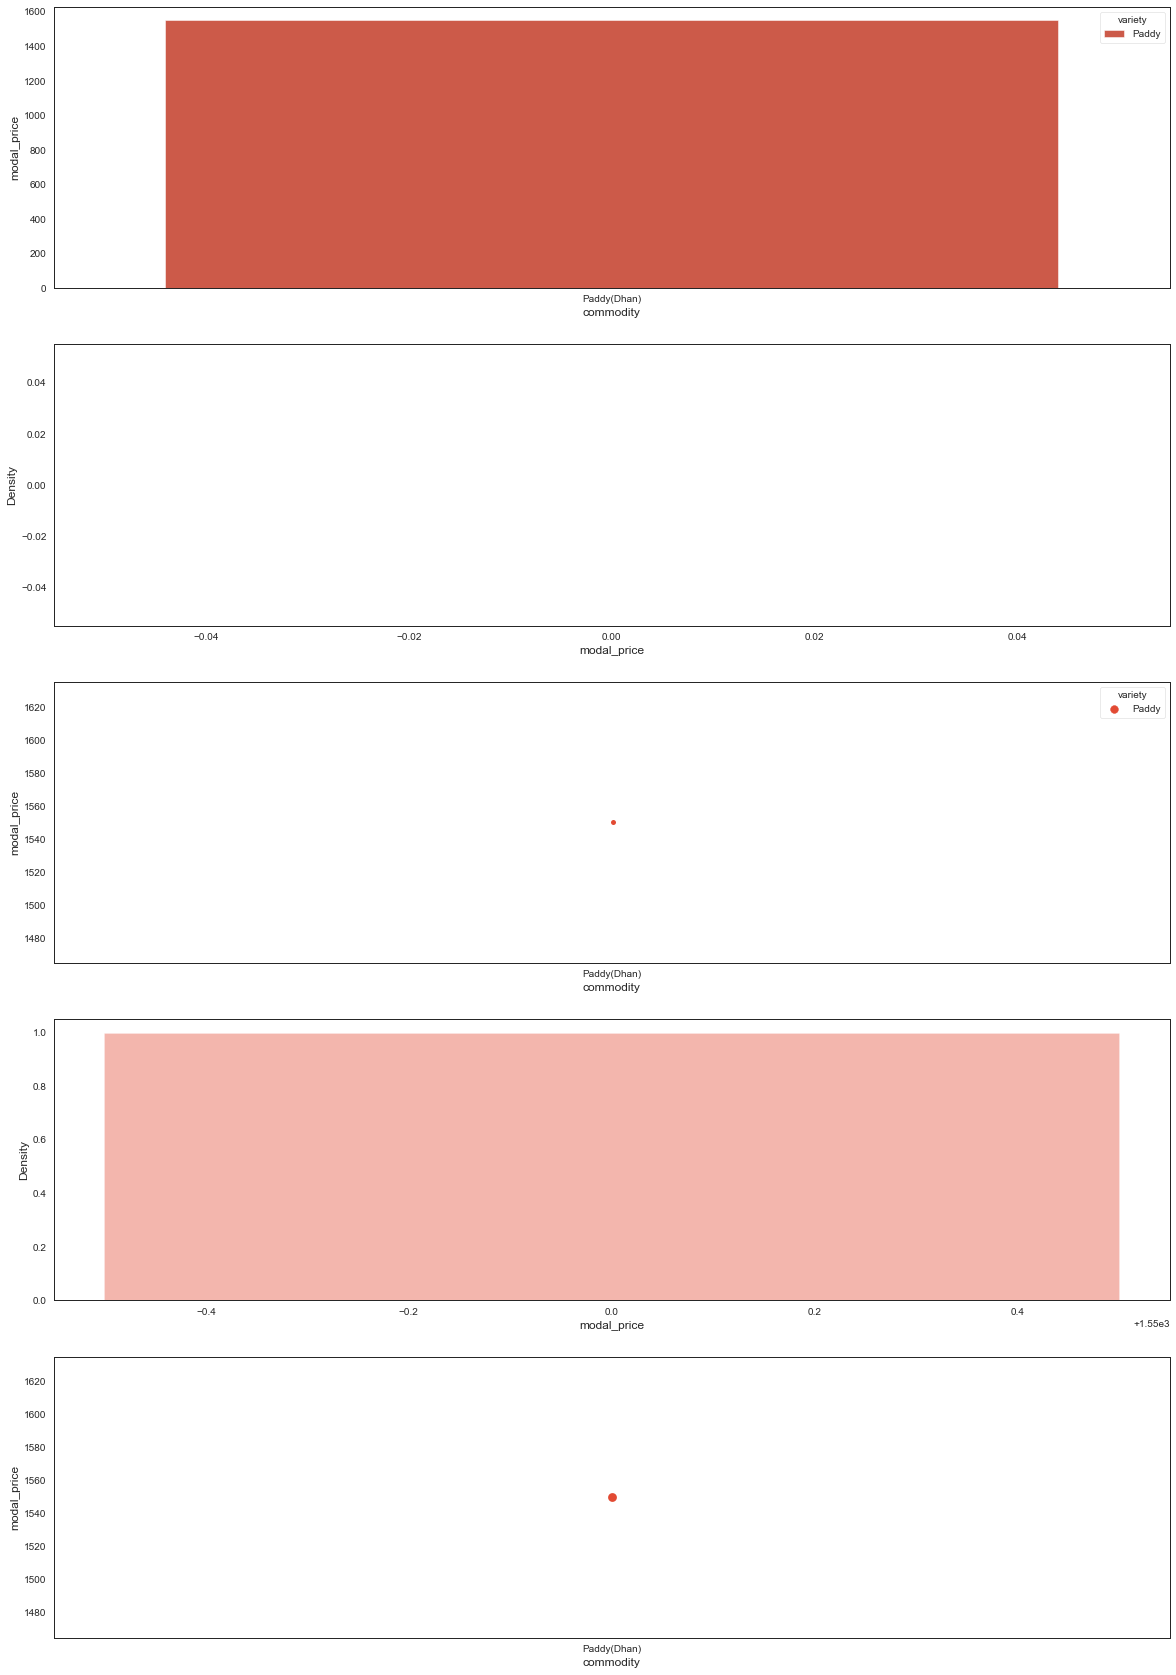

In [84]:
get_graphs("Telangana" , "Karimnagar" , "Dharmapuri")

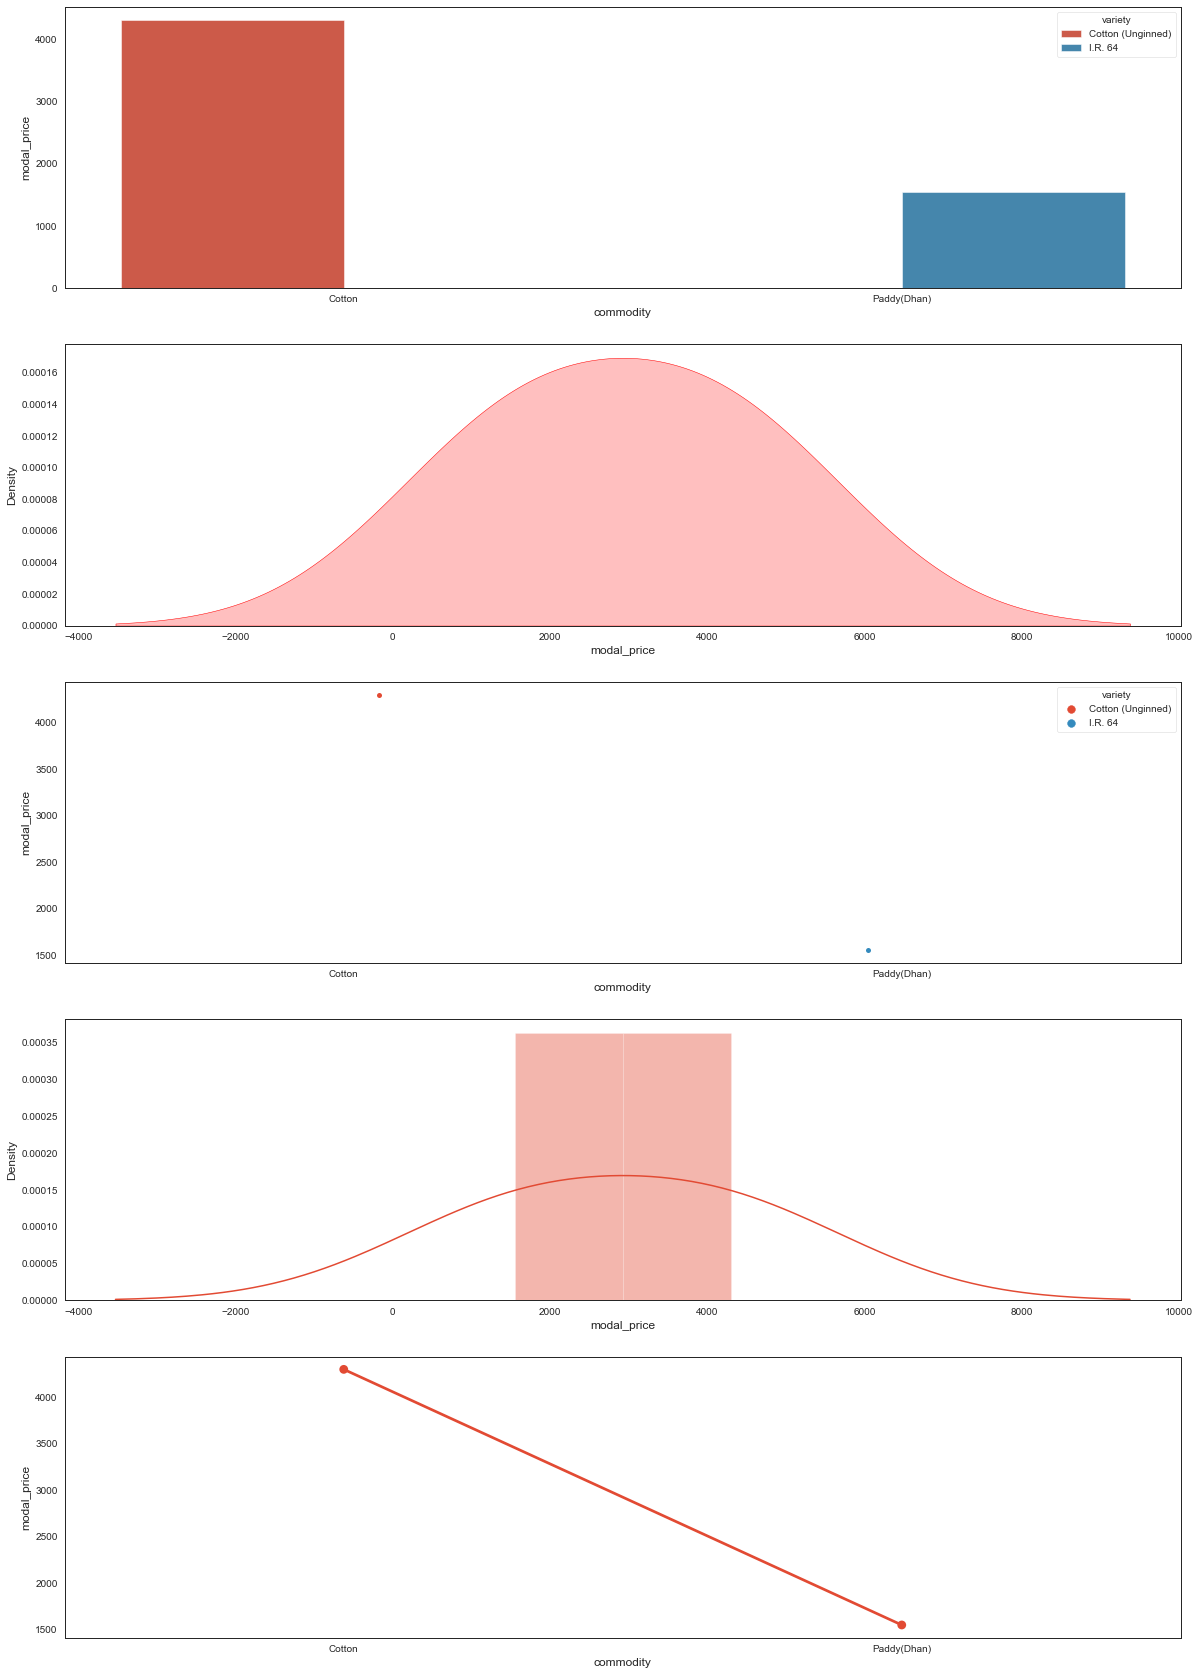

In [85]:
get_graphs("Telangana" , "Karimnagar" , "Gangadhara")

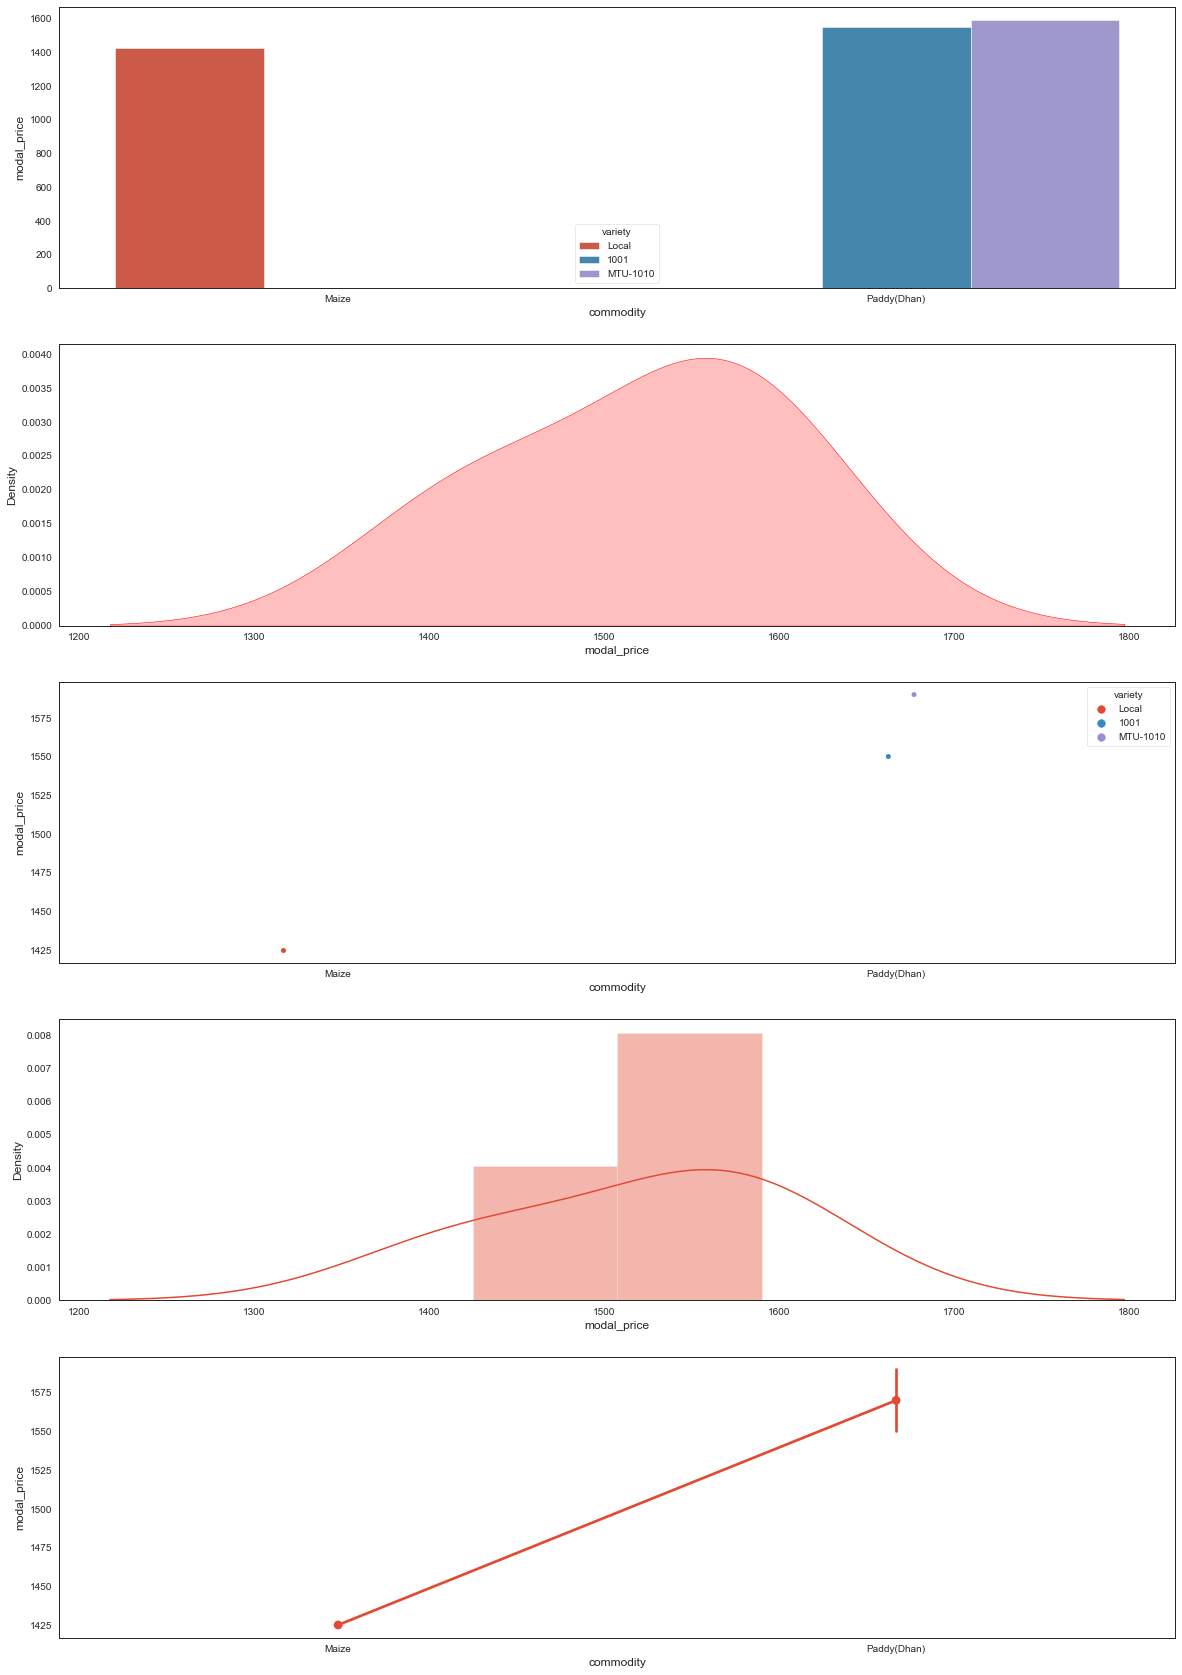

In [86]:
get_graphs("Telangana" , "Karimnagar" , "Huzzurabad")

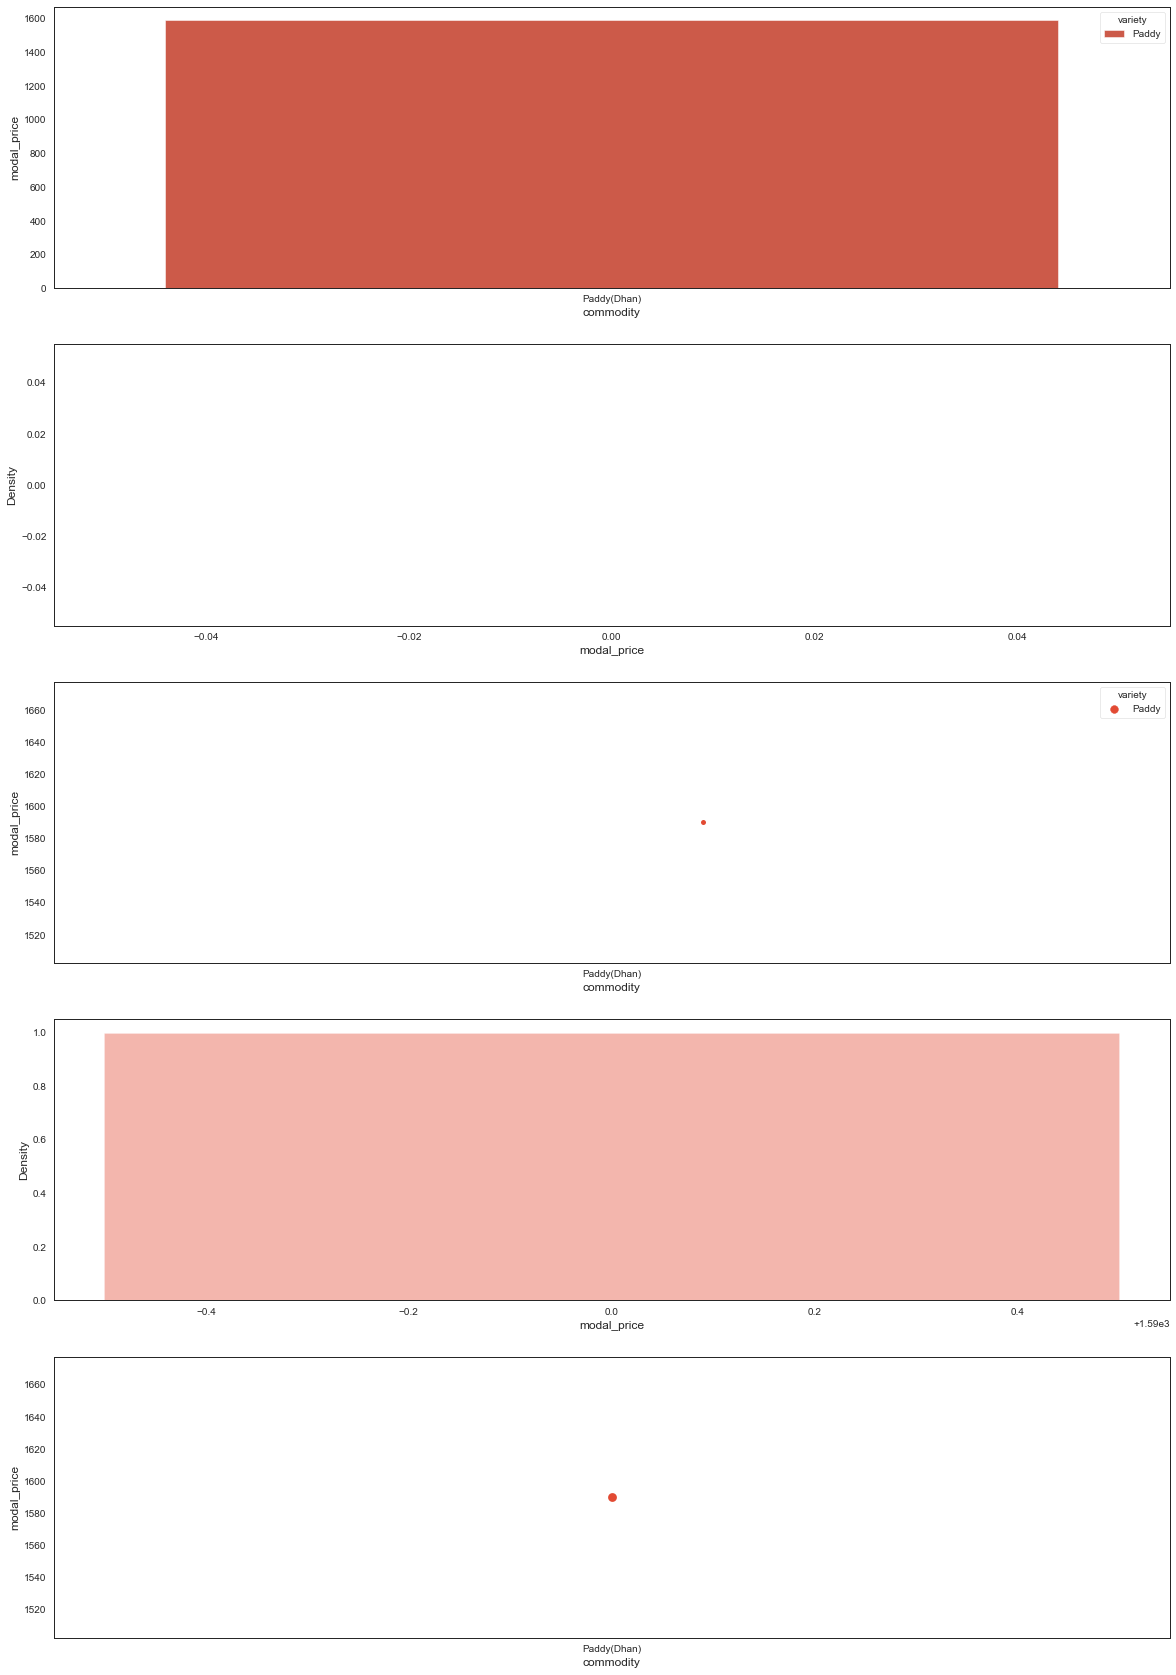

In [87]:
get_graphs("Telangana" , "Karimnagar" , "Gollapally")

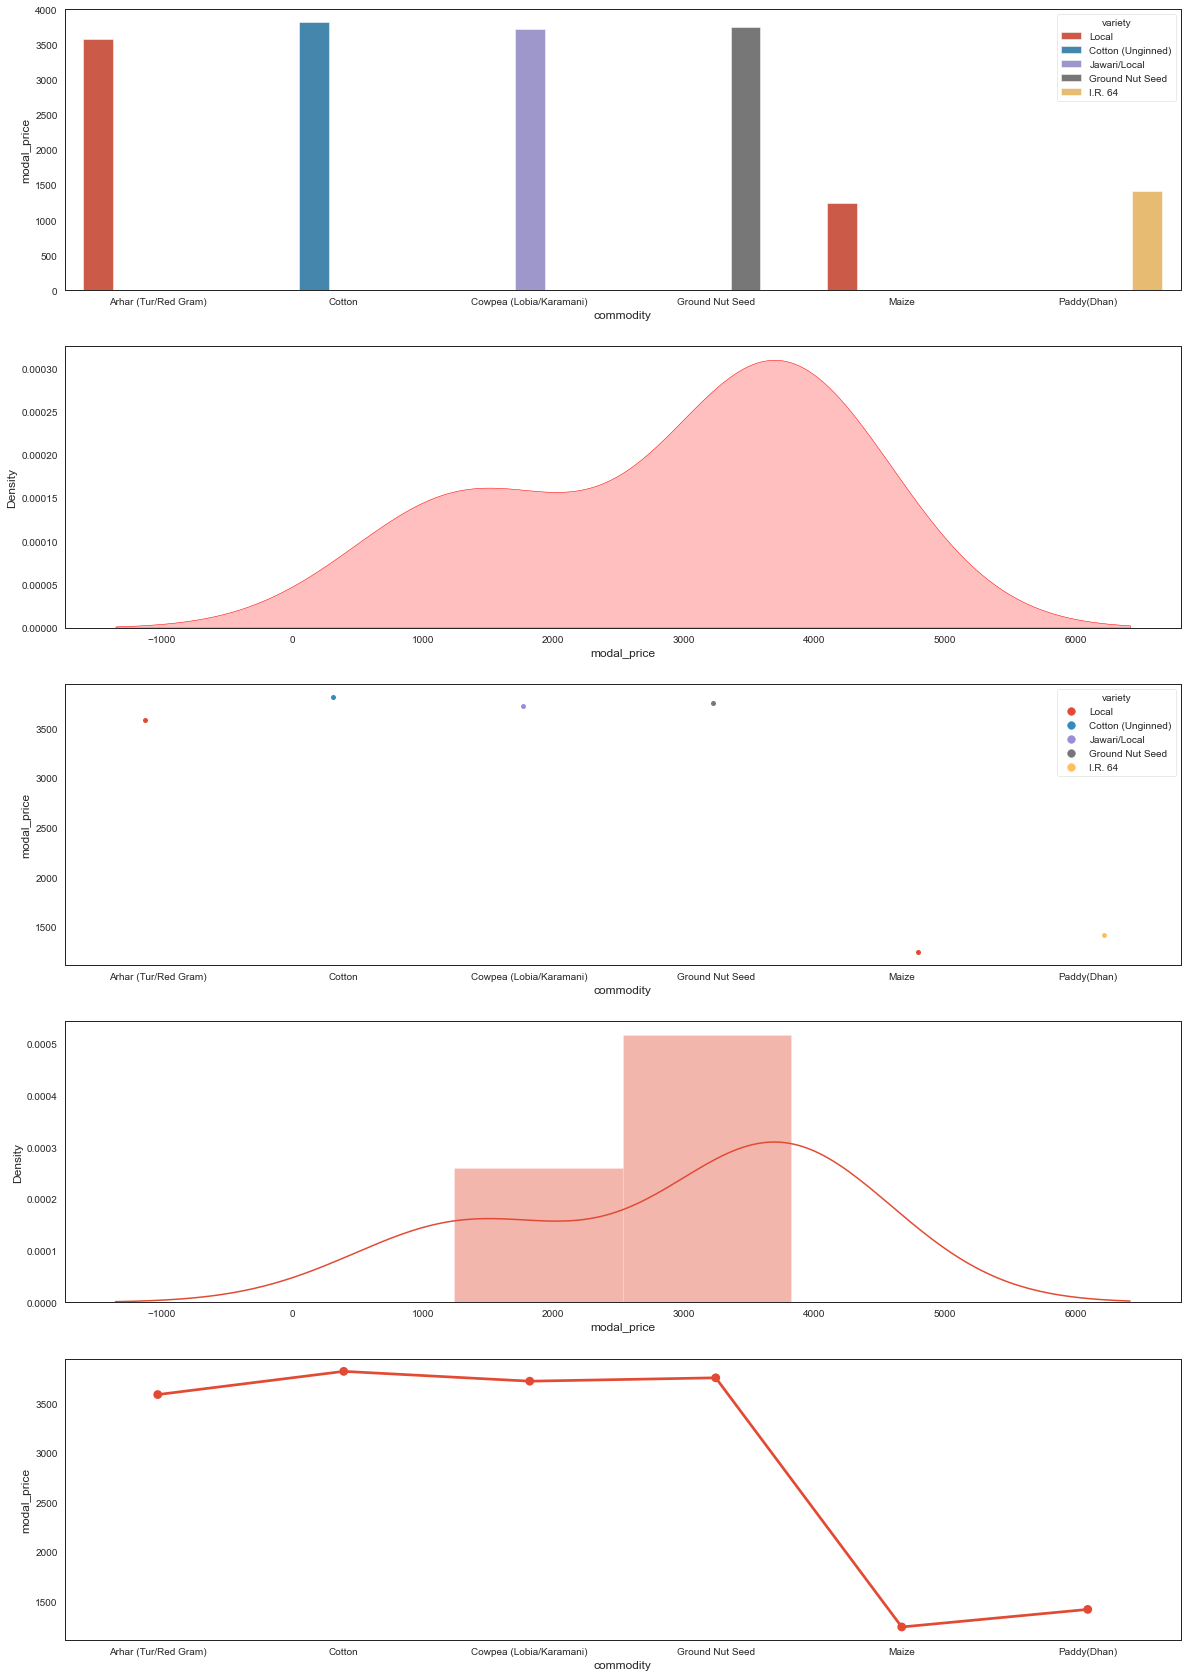

In [88]:
get_graphs("Telangana" , "Karimnagar" , "Karimnagar")

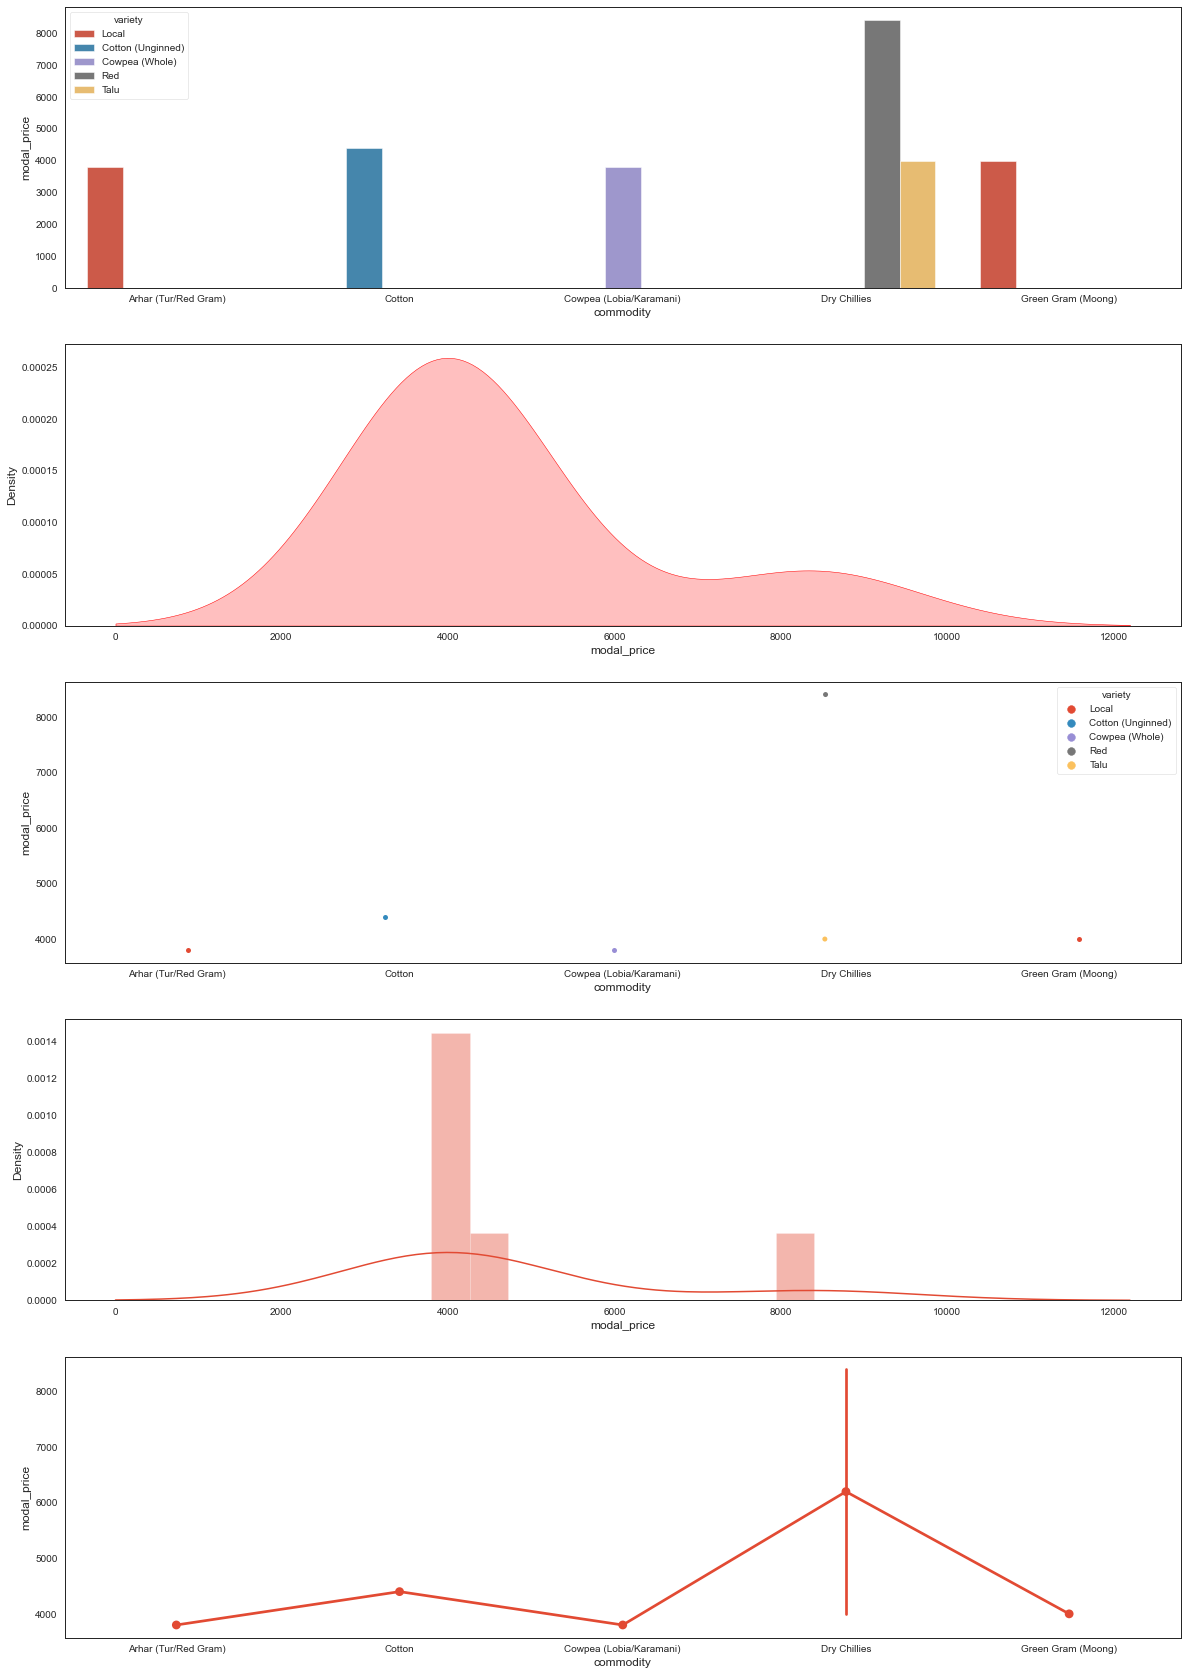

In [89]:
get_graphs("Telangana" , "Khammam" , "Khammam")

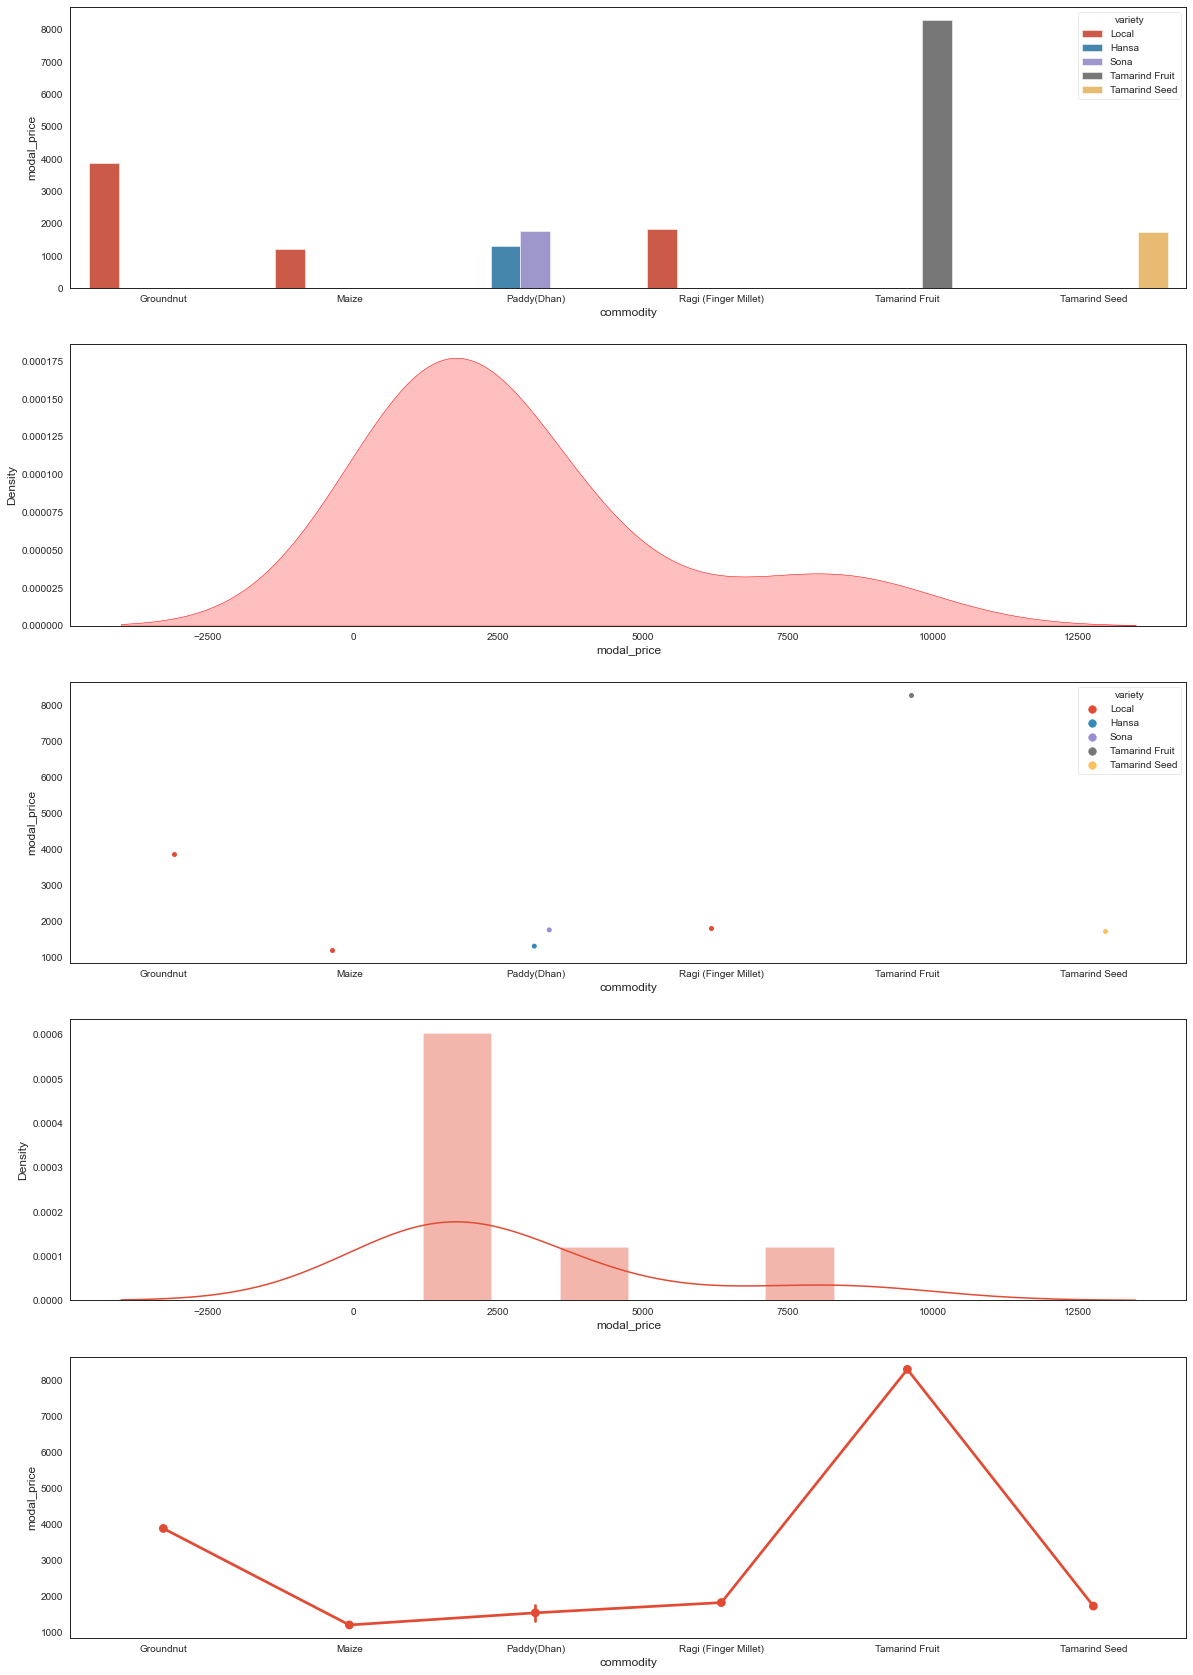

In [90]:
get_graphs("Telangana" , "Mahbubnagar" , "Mahbubnagar")

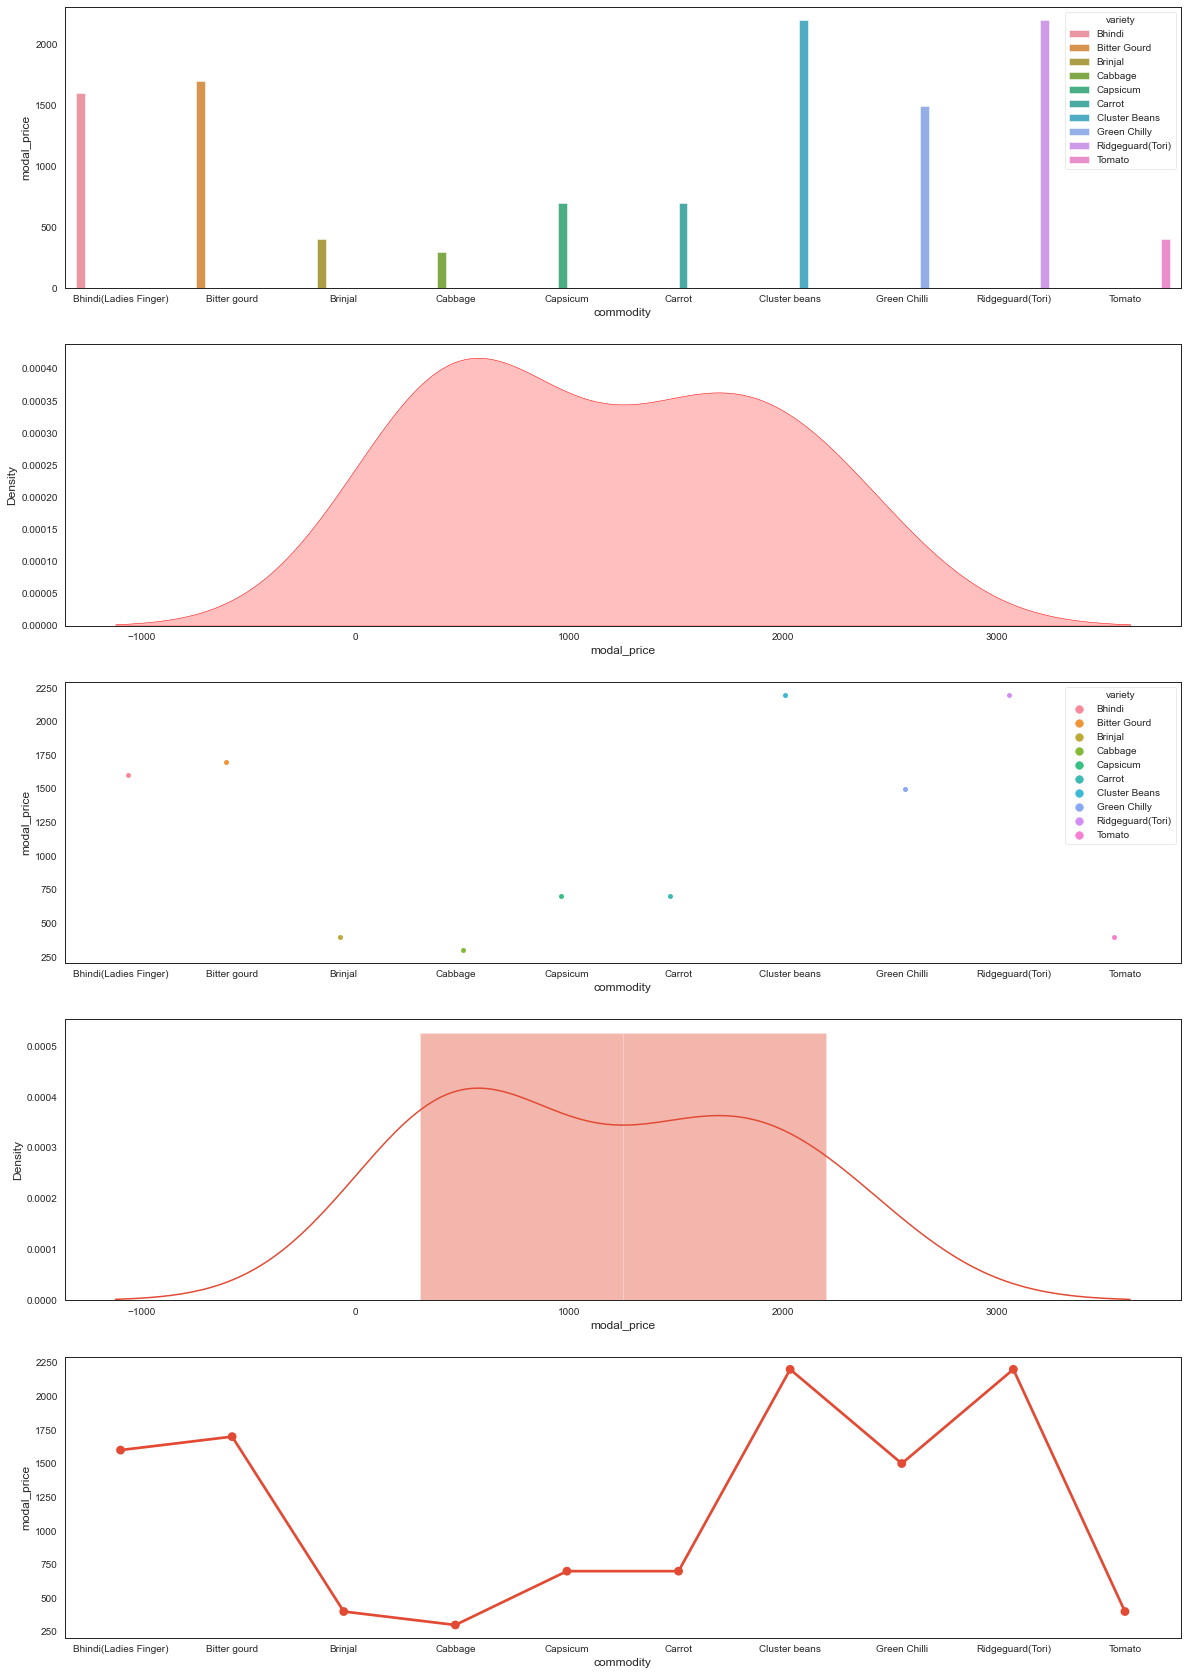

In [91]:
get_graphs("Telangana" , "Mahbubnagar" , "Shadnagar")

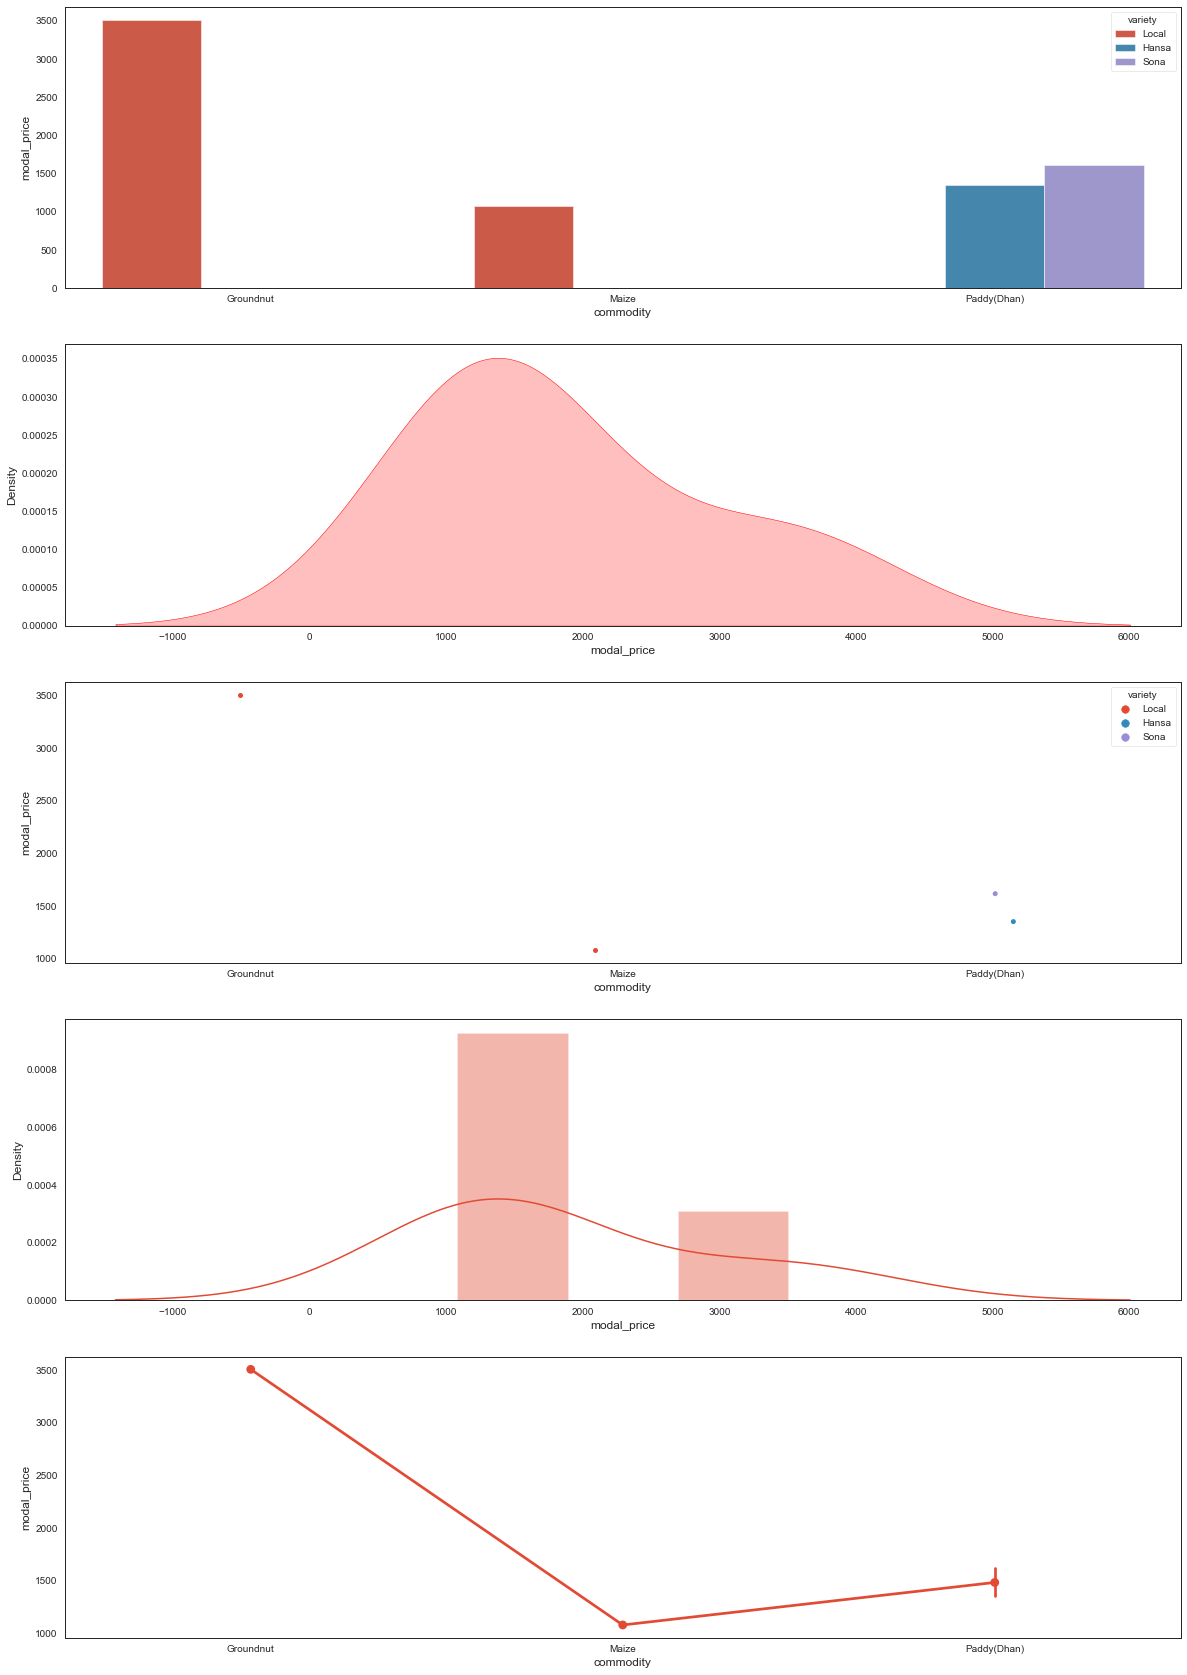

In [92]:
get_graphs("Telangana" , "Mahbubnagar" , "Wanaparthy town")

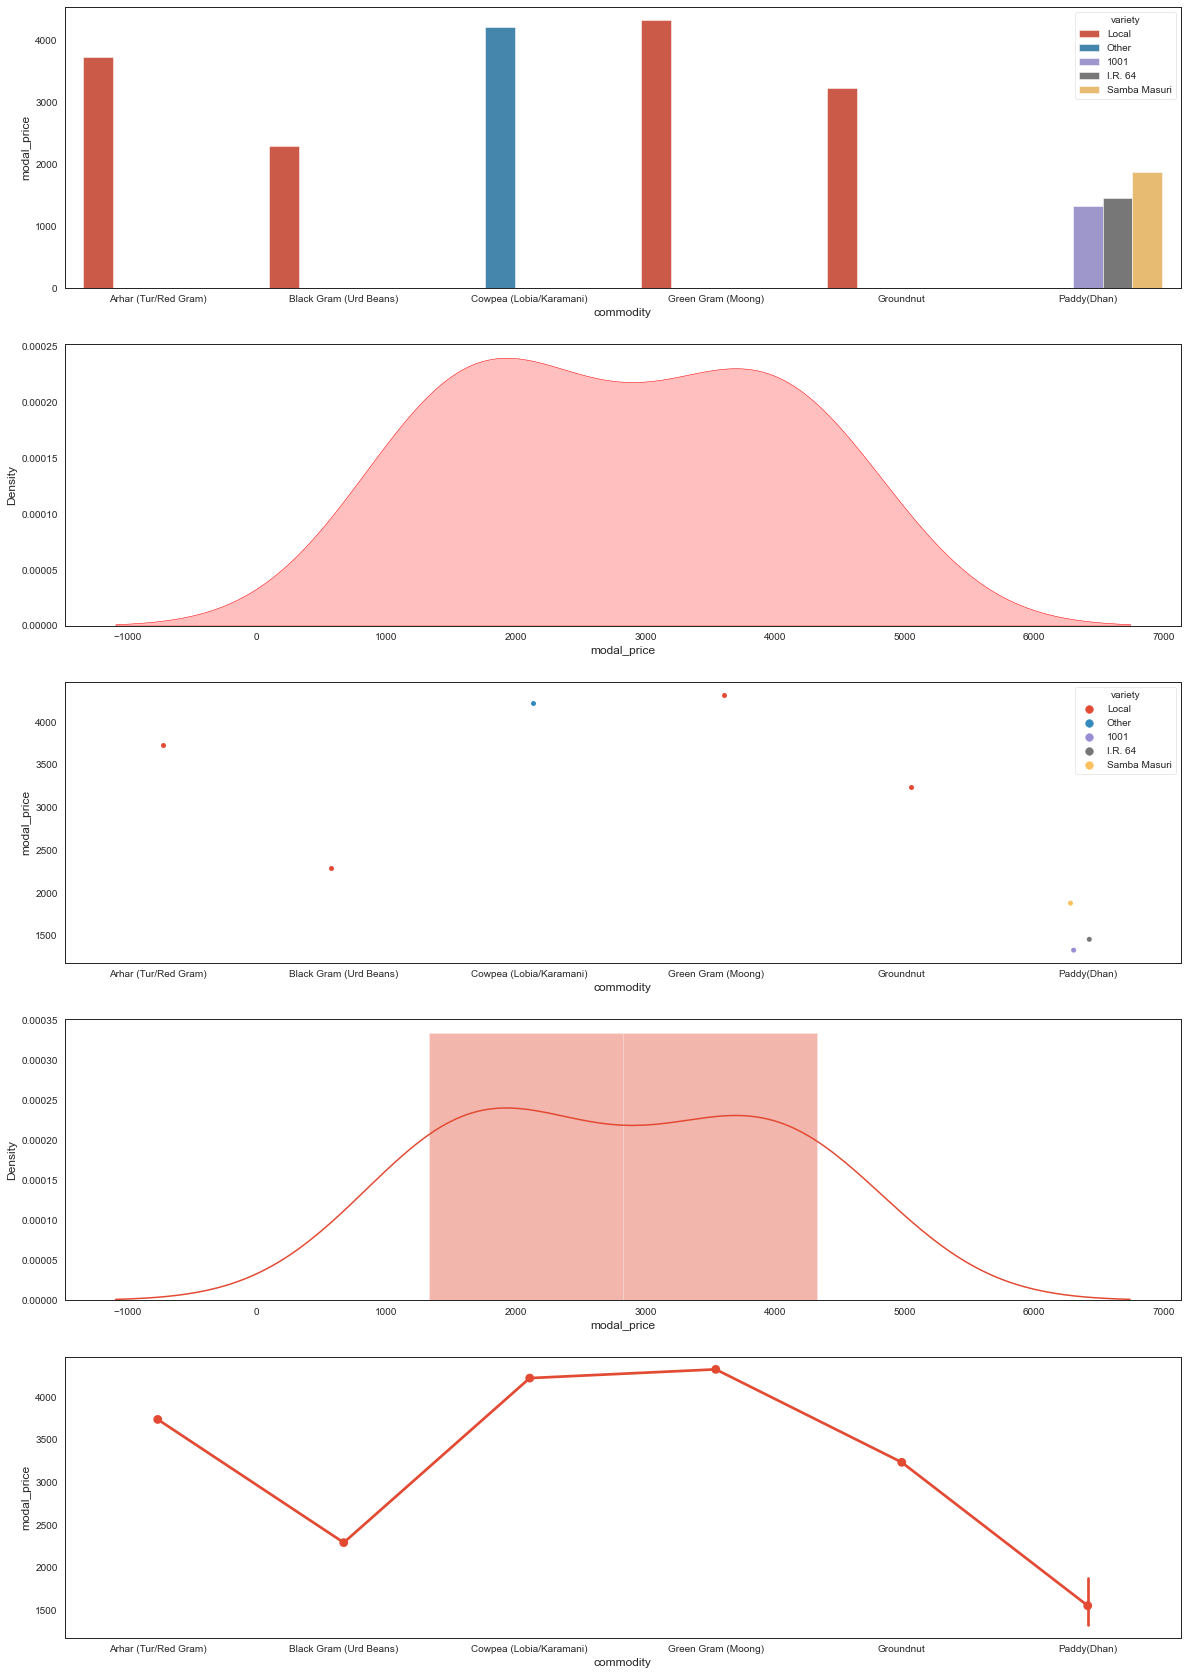

In [93]:
get_graphs("Telangana" , "Nalgonda" , "Suryapeta")

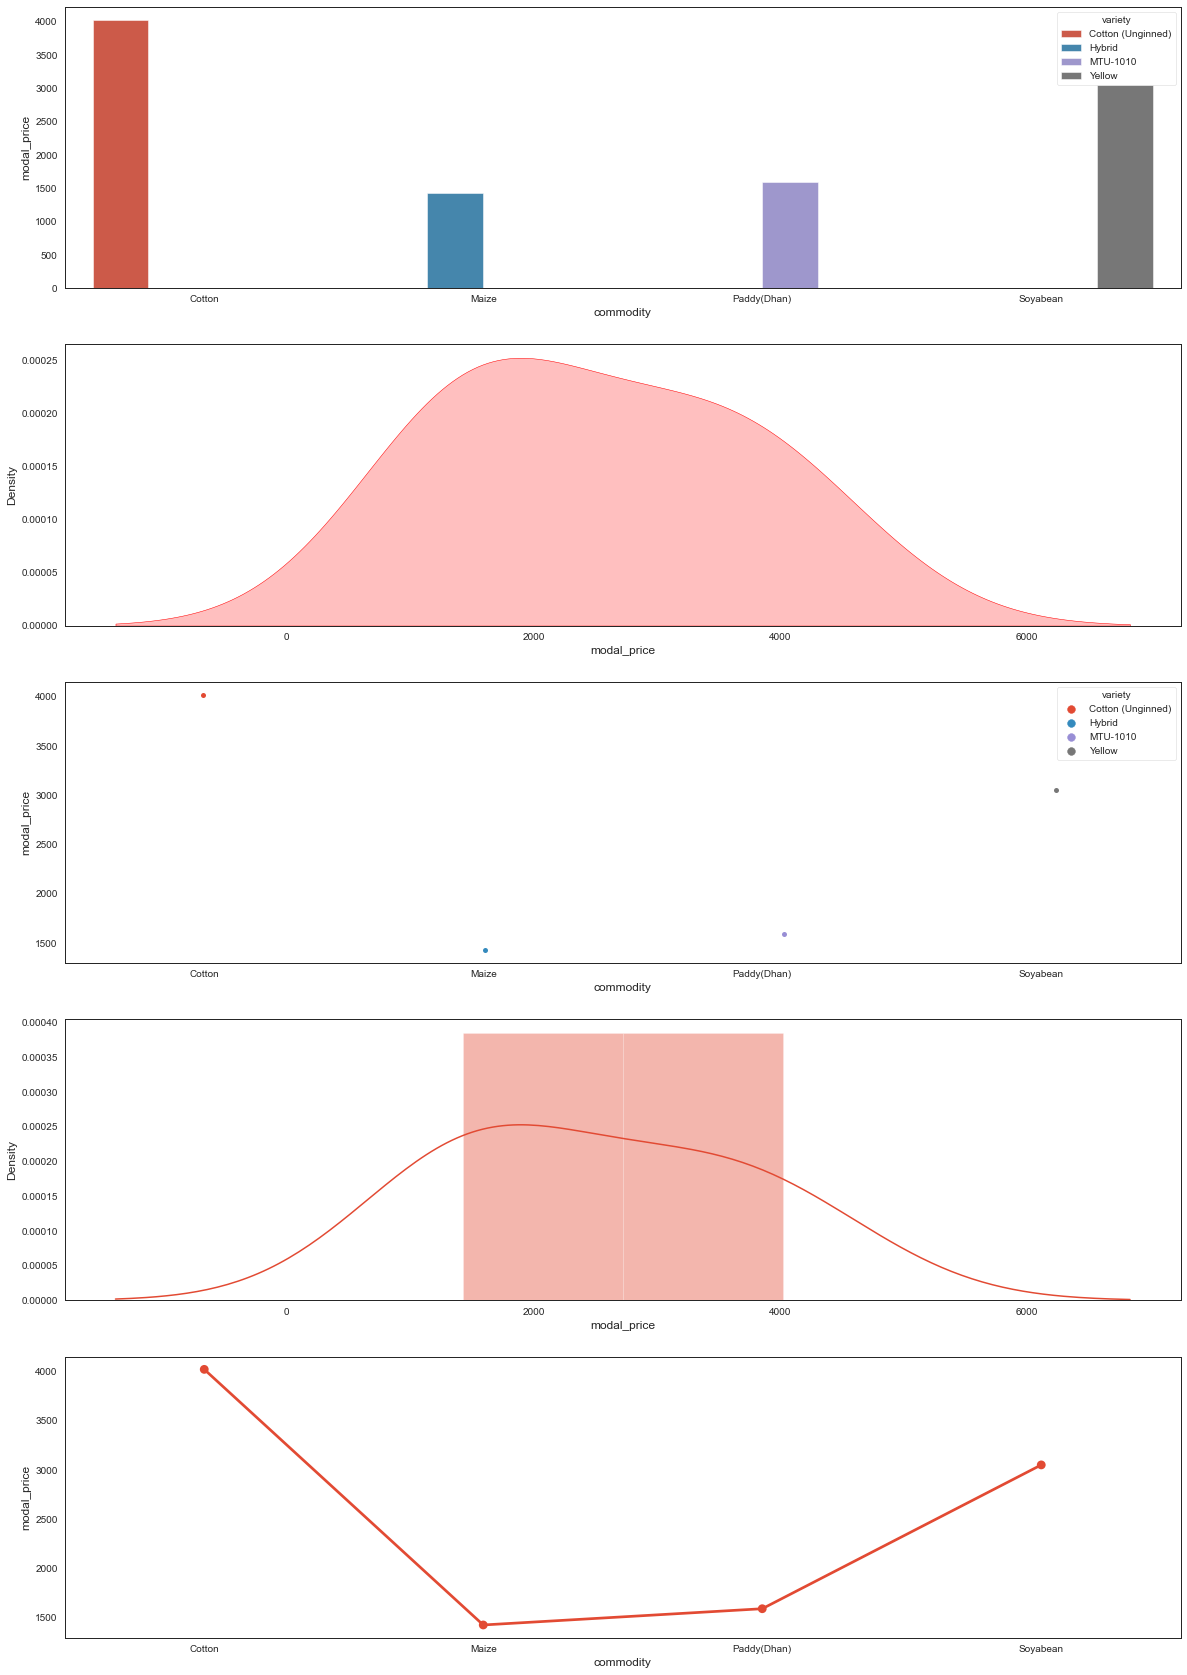

In [94]:
get_graphs("Telangana" , "Nizamabad" , "Gandhari")

In [95]:
 def pairplot(state , district , market):
    gp = df.loc[(df.state == state) & (df.district == district) & (df.market == market), : ]
    g = sns.PairGrid(gp , hue = "variety")
    g = g.map_diag(plt.hist)
    g = g.map_offdiag(plt.scatter)
    g = g.add_legend()
    g = plt.figure(figsize=(15,10))
    fig.savefig("4.png") 

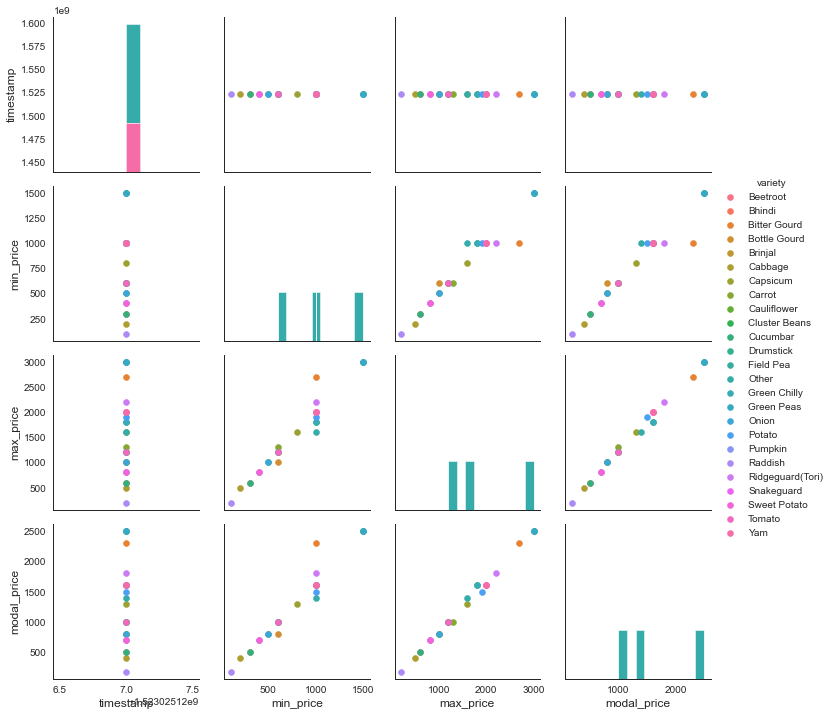

<Figure size 1080x720 with 0 Axes>

In [96]:
pairplot("Telangana" , "Hyderabad" , "Bowenpally")

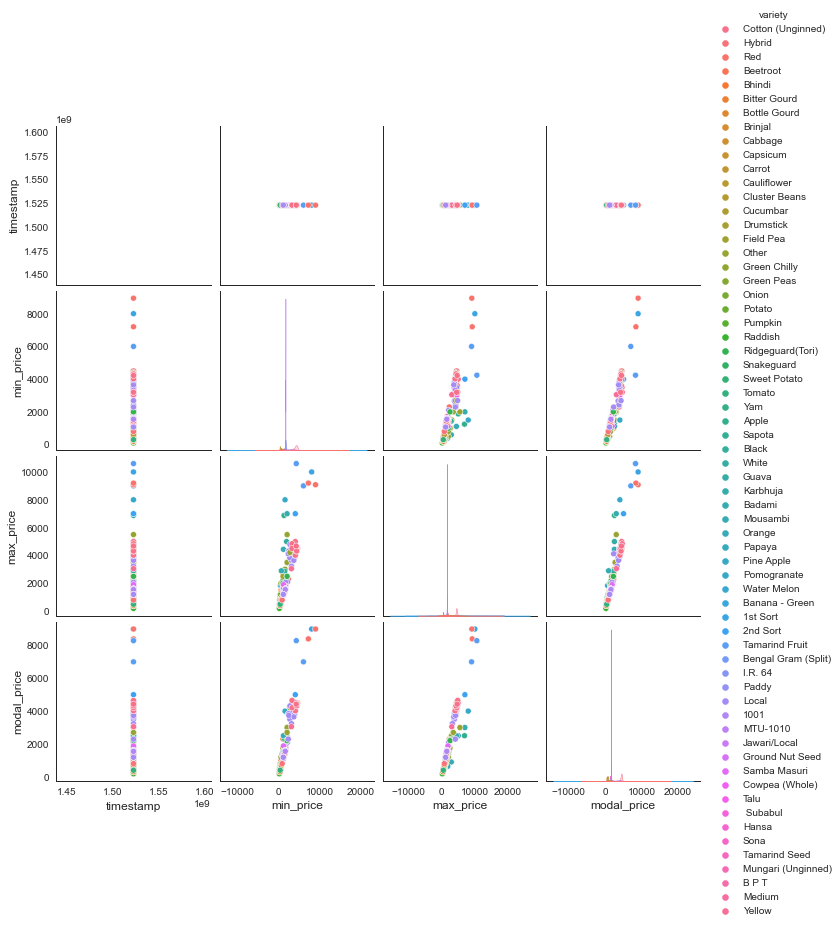

In [97]:
sns.pairplot(gp , hue = "variety")

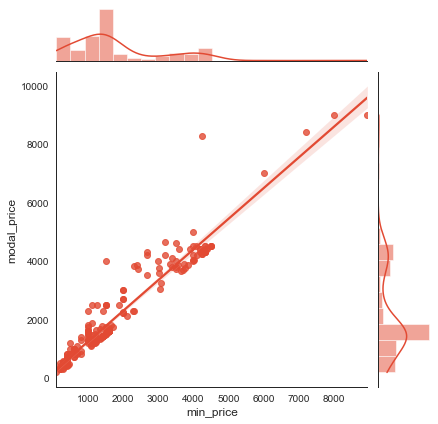

In [98]:
sns.jointplot(x="min_price", y="modal_price", data=gp , kind="reg")

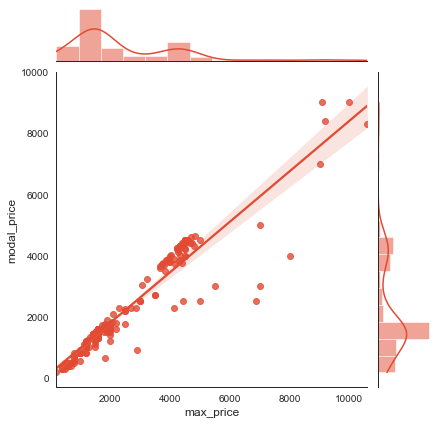

In [99]:
g = sns.jointplot(x="max_price", y="modal_price", data=gp , kind="reg")

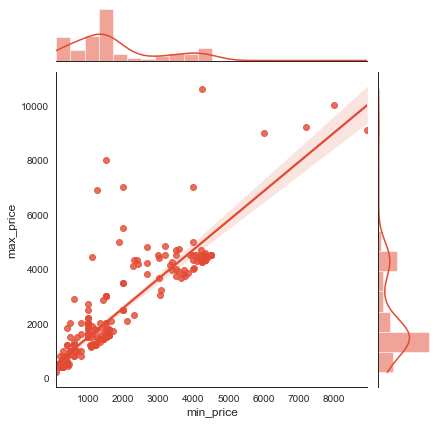

In [100]:
g = sns.jointplot(x="min_price", y="max_price", data=gp , kind="reg")

In [103]:
temp = df.loc[(df.state == "Telangana") & (df.district == "Hyderabad") & (df.commodity == "Brinjal"), : ]
temp

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
4441,1523025127,Telangana,Hyderabad,Bowenpally,Brinjal,Brinjal,06/04/2018,600.0,1200.0,1000.0
4483,1523025127,Telangana,Hyderabad,Gudimalkapur,Brinjal,Brinjal,06/04/2018,300.0,600.0,400.0
4509,1523025127,Telangana,Hyderabad,L B Nagar,Brinjal,Brinjal,06/04/2018,300.0,600.0,450.0


In [104]:
def get_val(state , district , commodity):
    temp = df.loc[(df.state == state) & (df.district == district) & (df.commodity == commodity), : ]
    fig, axes = plt.subplots(6,1)
    fig.set_size_inches(20, 30)
    sns.barplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[0] )
    sns.pointplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[1] )
    #sns.stripplot(x="market", y="min_price", data=temp , jitter=True ,  ax = axes[1])
    #sns.distplot(temp.modal_price , ax = axes[3])
    sns.barplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[2] )
    sns.pointplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[3] )
    sns.barplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[4] )
    sns.pointplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[5] )
    fig.savefig("3.png")    

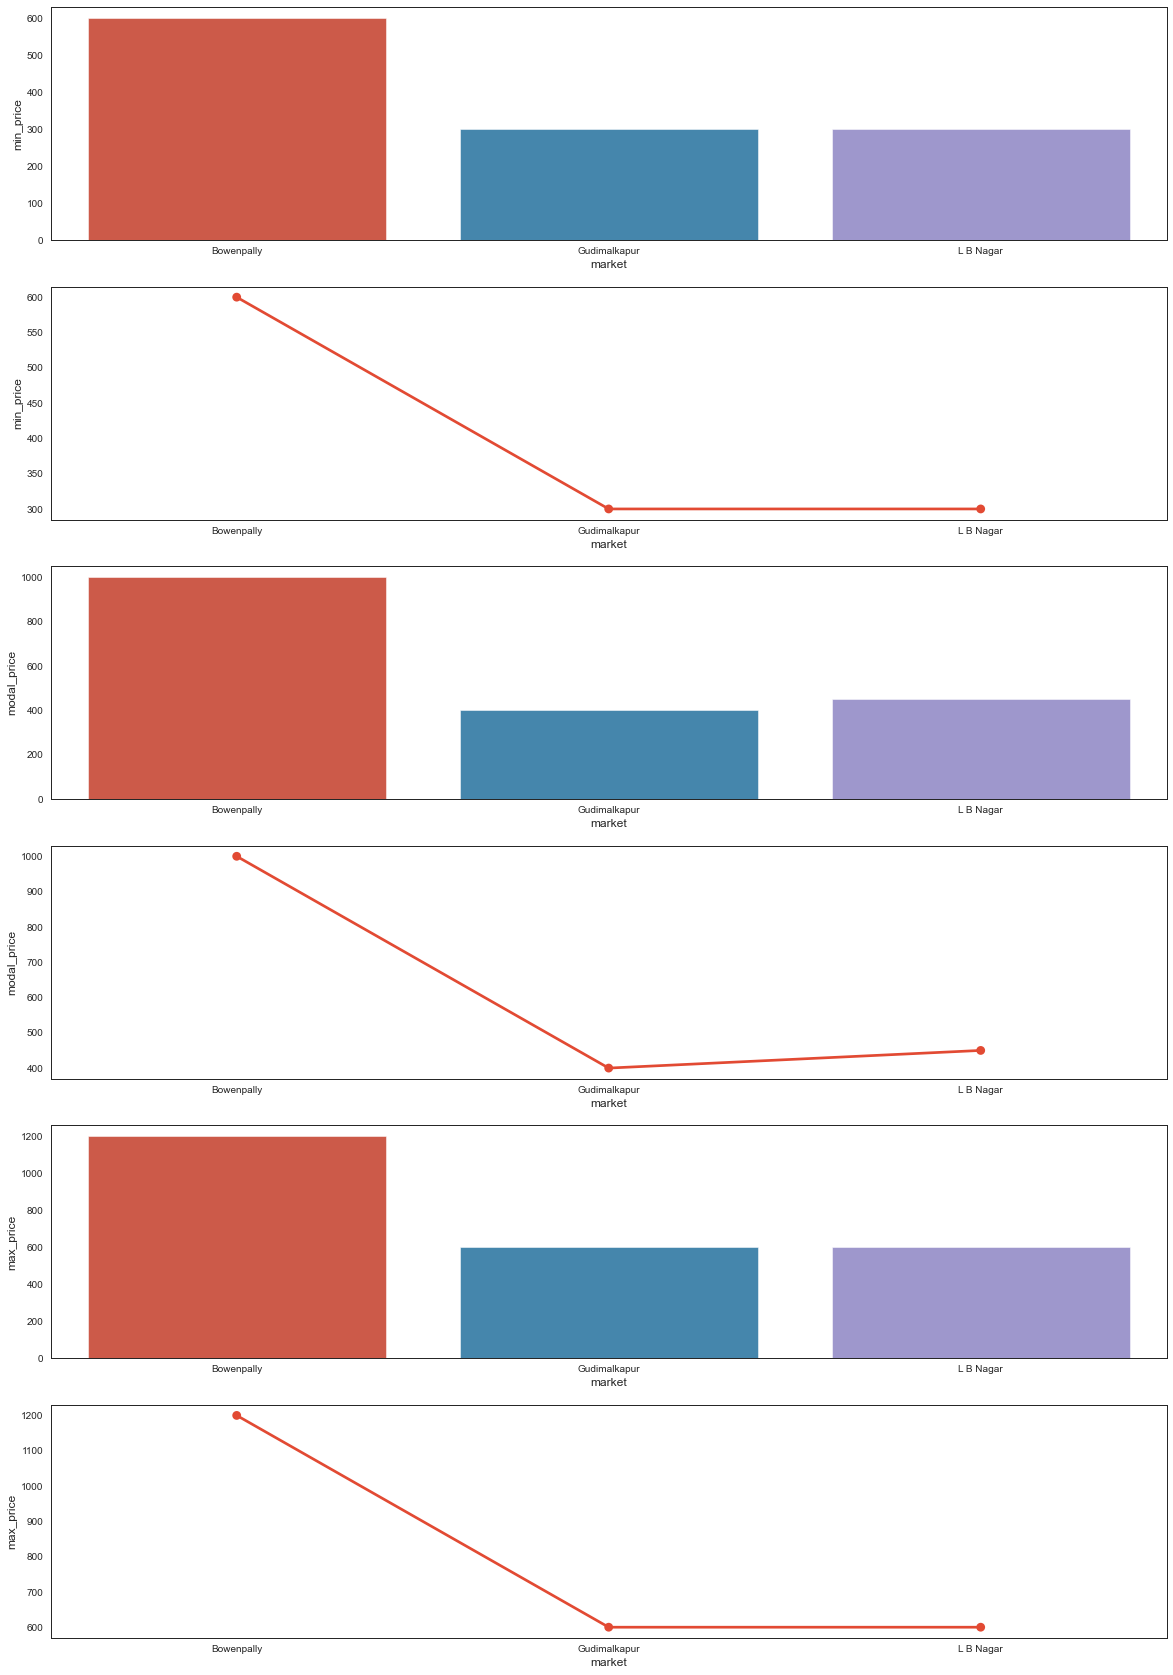

In [105]:
get_val("Telangana" , "Hyderabad" , "Brinjal")

In [140]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [141]:
df.groupby( ['state' , 'commodity'] ).mean()

timestamp    min_price  \
state       commodity                                               
Assam       Black Gram (Urd Beans)      1.523025e+09  2800.000000   
            Corriander seed             1.523025e+09  3500.000000   
            Green Chilli                1.523025e+09  1500.000000   
            Green Gram Dal (Moong Dal)  1.523025e+09  6200.000000   
            Jute                        1.523025e+09  3266.666667   
...                                              ...          ...   
West Bengal Ridgeguard(Tori)            1.523025e+09  2500.000000   
            Sugar                       1.523025e+09  3700.000000   
            Sweet Pumpkin               1.523025e+09   842.857143   
            Tomato                      1.523025e+09   633.888889   
            Wheat                       1.523025e+09  1626.250000   

                                          max_price  modal_price  
state       commodity                                             
Assam       Black Gram (Urd Beans)      3000.000000  2900.000000  
            Corriander seed             4000.000000  3825.000000  
            Green Chilli                2000.000000  1800.000000  
            Green Gram Dal (Moong Dal)  7000.000000  6600.000000  
            Jute                        3758.333333  3708.333333  
...                                             ...          ...  
West Bengal Ridgeguard(Tori)            2725.000000  2625.000000  
            Sugar                       3750.000000  3720.000000  
            Sweet Pumpkin               1042.857143   942.857143  
            Tomato                       818.333333   725.000000  
            Wheat                       1695.000000  1658.750000  

[820 rows x 4 columns]

In [142]:
df.groupby([df.state == "Telangana", df.commodity]).mean()

timestamp     min_price     max_price  \
state commodity                                                             
False Alasande Gram              1.523025e+09   3449.000000   4759.000000   
      Amaranthus                 1.523025e+09   2141.935484   2530.741935   
      Amphophalus                1.523025e+09   3036.842105   3405.263158   
      Apple                      1.523025e+09   6644.708333   7445.750000   
      Arecanut(Betelnut/Supari)  1.523025e+09  19148.116279  23008.325581   
...                                       ...           ...           ...   
True  Tamarind Seed              1.523025e+09   1725.000000   1736.000000   
      Tomato                     1.523025e+09    480.000000    740.000000   
      Water Melon                1.523025e+09    200.000000    500.000000   
      Wood                       1.523025e+09    440.000000    440.000000   
      Yam                        1.523025e+09   1000.000000   2000.000000   

                                  modal_price  
state commodity                                
False Alasande Gram               4453.500000  
      Amaranthus                  2341.161290  
      Amphophalus                 3239.473684  
      Apple                       7093.958333  
      Arecanut(Betelnut/Supari)  21692.093023  
...                                       ...  
True  Tamarind Seed               1725.000000  
      Tomato                       620.000000  
      Water Melon                  300.000000  
      Wood                         440.000000  
      Yam                         1600.000000  

[249 rows x 4 columns]

In [172]:
tg_df = df.loc[df['state']=='Telangana']

In [173]:
tg_df

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
4424,1523025127,Telangana,Adilabad,Adilabad,Cotton,Cotton (Unginned),06/04/2018,4068.0,4500.0,4500.0
4425,1523025127,Telangana,Adilabad,Asifabad,Cotton,Cotton (Unginned),06/04/2018,4320.0,4600.0,4500.0
4426,1523025127,Telangana,Adilabad,Bhainsa,Maize,Hybrid,06/04/2018,1089.0,1129.0,1104.0
4427,1523025127,Telangana,Adilabad,Boath,Cotton,Cotton (Unginned),06/04/2018,4200.0,4450.0,4400.0
4428,1523025127,Telangana,Adilabad,Ichoda,Cotton,Cotton (Unginned),06/04/2018,4500.0,4500.0,4500.0
...,...,...,...,...,...,...,...,...,...,...
4664,1523025127,Telangana,Warangal,Narsampet,Cotton,Cotton (Unginned),06/04/2018,3200.0,4500.0,4200.0
4665,1523025127,Telangana,Warangal,Narsampet,Maize,Hybrid,06/04/2018,1090.0,1210.0,1182.0
4666,1523025127,Telangana,Warangal,Thorrur,Cotton,Cotton (Unginned),06/04/2018,4320.0,4320.0,4320.0
4667,1523025127,Telangana,Warangal,Warangal,Cotton,Cotton (Unginned),06/04/2018,4225.0,4680.0,4425.0


In [174]:
tg_df.groupby([tg_df.commodity]).mean()

,timestamp,min_price,max_price,modal_price
commodity,,,,
Apple,1523025127,1250.000000,6875.000000,2500.000000
Arhar (Tur/Red Gram),1523025127,3332.333333,3875.166667,3745.166667
Banana - Green,1523025127,1500.000000,2000.000000,1700.000000
Beetroot,1523025127,500.000000,833.333333,683.333333
Bengal Gram(Gram),1523025127,4046.000000,4100.500000,4046.000000
Bhindi(Ladies Finger),1523025127,925.000000,1700.000000,1325.000000
Bitter gourd,1523025127,1275.000000,2025.000000,1762.500000
Black Gram (Urd Beans),1523025127,2293.000000,4119.000000,2293.000000
Bottle gourd,1523025127,366.666667,700.000000,516.666667


In [175]:
tg_df.describe(include='all')

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
count,2.450000e+02,245,245,245,245,245,245,245.000000,245.000000,245.000000
unique,NaN,1,10,105,58,64,1,NaN,NaN,NaN
top,NaN,Telangana,Hyderabad,Bowenpally,Paddy(Dhan),Cotton (Unginned),06/04/2018,NaN,NaN,NaN
freq,NaN,245,86,27,66,28,245,NaN,NaN,NaN
mean,1.523025e+09,NaN,NaN,NaN,NaN,NaN,NaN,1846.212245,2396.648980,2128.869388
std,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1423.252729,1792.637035,1562.304742
min,1.523025e+09,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,200.000000,180.000000
25%,1.523025e+09,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,1425.000000,1243.000000
50%,1.523025e+09,NaN,NaN,NaN,NaN,NaN,NaN,1550.000000,1590.000000,1590.000000
75%,1.523025e+09,NaN,NaN,NaN,NaN,NaN,NaN,2293.000000,3755.000000,3000.000000


In [176]:
tg_df.shape

(245, 10)

In [177]:
tg_df.dtypes

timestamp         int64
state            object
district         object
market           object
commodity        object
variety          object
arrival_date     object
min_price       float64
max_price       float64
modal_price     float64
dtype: object

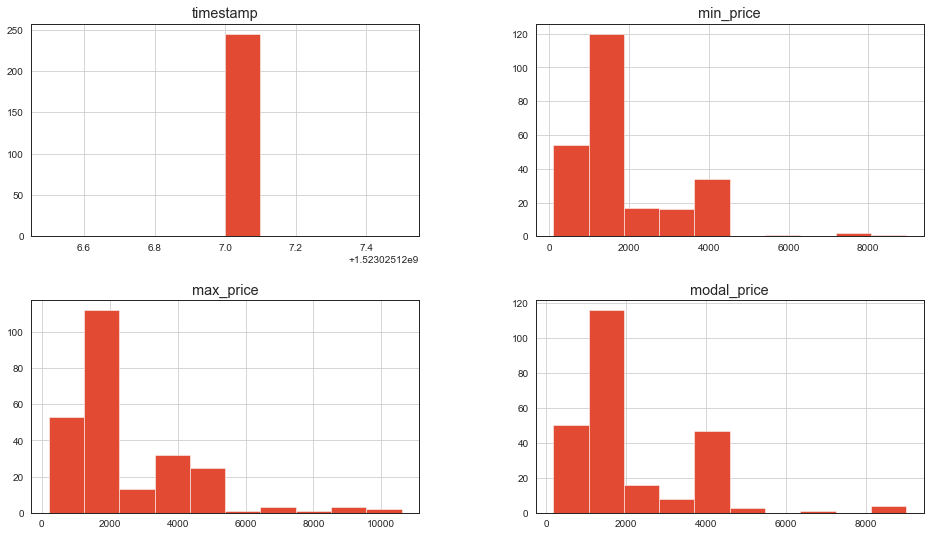

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[16,9]

tg_df.hist()
plt.show()

In [179]:
tg_df=tg_df.drop(["state"],axis=1)

In [180]:
ymin = tg_df['min_price']
ymax = tg_df['max_price']
ymodal = tg_df['modal_price']
tg_df = tg_df.drop(['min_price'],axis=1)
tg_df = tg_df.drop(['max_price'],axis=1)
tg_df = tg_df.drop(['modal_price'],axis=1)
tg_df = tg_df.drop(['timestamp'], axis=1)
tg_df = tg_df.drop(['arrival_date'], axis=1)
tg_df.describe(include='all')

,district,market,commodity,variety
count,245,245,245,245
unique,10,105,58,64
top,Hyderabad,Bowenpally,Paddy(Dhan),Cotton (Unginned)
freq,86,27,66,28


In [181]:
tg_df

,district,market,commodity,variety
4424,Adilabad,Adilabad,Cotton,Cotton (Unginned)
4425,Adilabad,Asifabad,Cotton,Cotton (Unginned)
4426,Adilabad,Bhainsa,Maize,Hybrid
4427,Adilabad,Boath,Cotton,Cotton (Unginned)
4428,Adilabad,Ichoda,Cotton,Cotton (Unginned)
...,...,...,...,...
4664,Warangal,Narsampet,Cotton,Cotton (Unginned)
4665,Warangal,Narsampet,Maize,Hybrid
4666,Warangal,Thorrur,Cotton,Cotton (Unginned)
4667,Warangal,Warangal,Cotton,Cotton (Unginned)


In [182]:
ymin.head()

4424    4068.0
4425    4320.0
4426    1089.0
4427    4200.0
4428    4500.0
Name: min_price, dtype: float64

In [183]:
ymax.head()

4424    4500.0
4425    4600.0
4426    1129.0
4427    4450.0
4428    4500.0
Name: max_price, dtype: float64

In [184]:
ymodal.head()

4424    4500.0
4425    4500.0
4426    1104.0
4427    4400.0
4428    4500.0
Name: modal_price, dtype: float64

In [185]:
tg_df=pd.get_dummies(tg_df)
tg_df.head()

,district_Adilabad,district_Hyderabad,district_Karimnagar,district_Khammam,district_Mahbubnagar,district_Medak,district_Nalgonda,district_Nizamabad,district_Ranga Reddy Dist.,district_Warangal,...,variety_Sona,variety_Sweet Potato,variety_Talu,variety_Tamarind Fruit,variety_Tamarind Seed,variety_Tomato,variety_Water Melon,variety_White,variety_Yam,variety_Yellow
4424,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4425,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4426,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4427,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4428,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
tg_df.head()

,district_Adilabad,district_Hyderabad,district_Karimnagar,district_Khammam,district_Mahbubnagar,district_Medak,district_Nalgonda,district_Nizamabad,district_Ranga Reddy Dist.,district_Warangal,...,variety_Sona,variety_Sweet Potato,variety_Talu,variety_Tamarind Fruit,variety_Tamarind Seed,variety_Tomato,variety_Water Melon,variety_White,variety_Yam,variety_Yellow
4424,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4425,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4426,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4427,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4428,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TRAIN TEST SPLIT ON ymin

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, ymin_train, ymin_test = train_test_split(tg_df, ymin, test_size=0.25)

# LINEAR REGRESSION ON ymin

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train,ymin_train)
ymin_predicted = reg.predict(X_test)
r2_score(ymin_predicted,ymin_test)

-0.01642057196730118

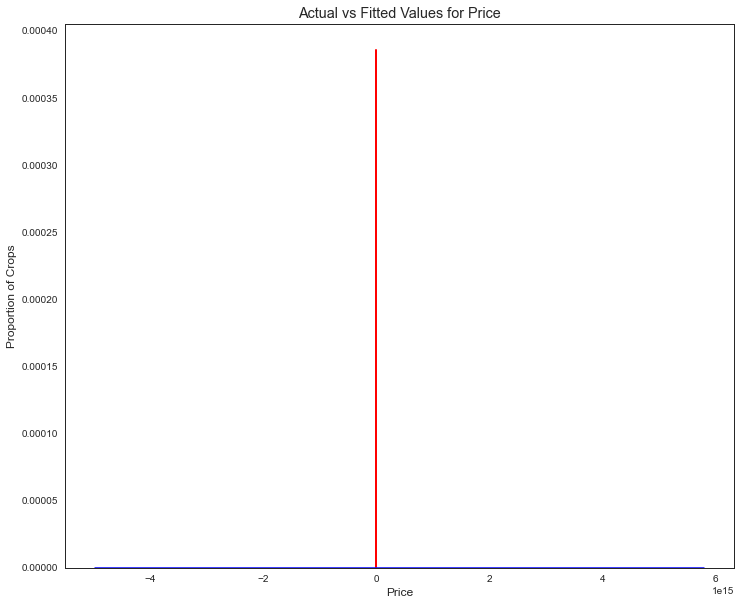

In [189]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(ymin_test, hist=False, color="r", label="Actual Value")
sns.distplot(ymin_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Crops')

plt.show()
plt.close()

# DECISION TREE REGRESSION ON ymin

In [191]:
from sklearn import tree

clf=tree.DecisionTreeRegressor()
clf.fit(X_train, ymin_train)
x_predicted=clf.predict(X_test)
r2_score(x_predicted,ymin_test)

0.49891606175279357

# RANDOM FOREST REGRESSION ON ymin

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfr=RandomForestRegressor()
rfr.fit(X_train,ymin_train)
rfr.score(X_test,ymin_test)

0.6502247448993533

# TRAIN TEST SPLIT ON ymax

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, ymax_train, ymax_test = train_test_split(tg_df, ymax, test_size=0.25)

# LINEAR REGRESSION ON ymax

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train,ymax_train)
ymax_predicted = reg.predict(X_test)
r2_score(ymax_predicted,ymax_test)

-0.0277964018328698

# DECISION TREE REGRESSION ON ymax

In [196]:
from sklearn import tree

clf=tree.DecisionTreeRegressor()
clf.fit(X_train, ymax_train)
x_predicted=clf.predict(X_test)
r2_score(x_predicted,ymax_test)

0.4297807633742563

# RANDOM FOREST REGRESSION ON ymax

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfr=RandomForestRegressor()
rfr.fit(X_train,ymax_train)
rfr.score(X_test,ymax_test)

0.6464530159084843

# TRAIN TEST SPLIT ON ymodal

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, ymodal_train, ymodal_test = train_test_split(tg_df, ymodal, test_size=0.25)

# LINEAR REGRESSION ON ymodal

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train,ymodal_train)
ymodal_predicted = reg.predict(X_test)
r2_score(ymax_predicted,ymodal_test)

-0.0277964018328829

# DECISION TREE REGRESSION ON ymodal

In [200]:
from sklearn import tree

clf=tree.DecisionTreeRegressor()
clf.fit(X_train, ymodal_train)
x_predicted=clf.predict(X_test)
r2_score(x_predicted,ymodal_test)

0.25862307343632485

# RANDOM FOREST REGRESSION ON ymodal

In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfr=RandomForestRegressor()
rfr.fit(X_train,ymodal_train)
rfr.score(X_test,ymodal_test)

0.4946503015399428